In [12]:
import pandas as pd

data = pd.read_excel('merged_data.xlsx')

In [13]:
data = pd.DataFrame(data)

In [14]:
data.describe()

,Year,FemaleLaborParticipationRate,AvgHoursWorked,BothWorking,FirstBirthAge,MarriageAge,MarriageRate,EmploymentRate,UnemploymentRate,HousingPrice,...,GDI,GDP,GNI,PovertyGap,EduExpenditureOfGDP,EduExpenditureOfGov,TotalLaborParticipationRate,InflationRate,Population,FertilityRate
count,480.000000,480.000000,453.000000,191.00000,455.000000,174.000000,406.000000,465.000000,434.000000,414.000000,...,470.000000,479.000000,455.000000,308.000000,415.000000,370.000000,480.000000,480.000000,4.800000e+02,480.000000
mean,2005.500000,62.495477,1714.458318,53.27801,29.860879,28.442529,5.116502,53.527566,8.845411,92.217972,...,0.970719,33227.810761,32756.292660,0.714935,4.750921,10.826099,70.442933,4.960981,3.635168e+07,1.466667
std,9.242726,9.149430,165.567786,8.97173,1.456630,2.434869,1.067013,6.580891,5.000892,31.101829,...,0.020752,18584.903258,15186.544459,0.768372,0.880748,2.117145,6.216736,37.385507,3.425151e+07,0.199506
min,1990.000000,40.350000,1319.131000,33.90000,25.600000,22.200000,3.000000,37.720000,2.058333,34.283615,...,0.897000,5952.660254,5635.421492,0.000000,1.934330,7.111896,57.126000,-1.735902,3.818570e+05,0.810000
25%,1997.750000,56.317250,1592.659000,46.70000,29.000000,26.600000,4.500000,48.776000,4.977083,69.036798,...,0.958000,21536.734695,21953.876179,0.100000,4.186375,9.263991,65.669000,0.919646,8.636006e+06,1.330000
50%,2005.500000,62.416500,1716.341000,52.00000,29.900000,28.800000,5.100000,54.028000,7.943333,95.335375,...,0.973000,29617.518625,30179.760620,0.400000,4.801720,10.419736,70.863500,1.991838,3.240746e+07,1.420000
75%,2013.250000,69.820500,1811.852000,61.90000,30.900000,30.475000,5.600000,58.342000,10.656247,108.210895,...,0.986000,40091.599914,41014.097619,1.100000,5.294310,12.211717,74.817000,3.337716,5.686780e+07,1.570000
max,2021.000000,80.061000,2228.000000,71.00000,33.400000,32.900000,9.600000,67.185000,27.825000,208.037500,...,1.008000,131430.737036,91669.488340,5.800000,7.678350,15.645463,84.142000,812.150000,1.280840e+08,2.020000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            480 non-null    object 
 1   Year                          480 non-null    int64  
 2   Country Name                  480 non-null    object 
 3   FemaleLaborParticipationRate  480 non-null    float64
 4   AvgHoursWorked                453 non-null    float64
 5   BothWorking                   191 non-null    float64
 6   FirstBirthAge                 455 non-null    float64
 7   MarriageAge                   174 non-null    float64
 8   MarriageRate                  406 non-null    float64
 9   EmploymentRate                465 non-null    float64
 10  UnemploymentRate              434 non-null    float64
 11  HousingPrice                  414 non-null    float64
 12  InterestRate                  432 non-null    float64
 13  PartT

## 결측치 비율

In [16]:
import pandas as pd
missing_ratio = data.isnull().mean() * 100
missing_ratio_df = pd.DataFrame(missing_ratio, columns=['missing_ratio'])
missing_ratio_df.sort_values(by='missing_ratio', ascending=False, inplace=True)
print(missing_ratio_df)

                              missing_ratio
MarriageAge                       63.750000
BothWorking                       60.208333
PovertyGap                        35.833333
HealthExpenditure                 33.750000
EduExpenditureOfGov               22.916667
MarriageRate                      15.416667
HousingPrice                      13.750000
LaborMarketExpenditure            13.541667
EduExpenditureOfGDP               13.541667
InterestRate                      10.000000
UnemploymentRate                   9.583333
FamilyExpenditure                  7.291667
UnemploymentExpenditure            7.083333
AvgHoursWorked                     5.625000
FirstBirthAge                      5.208333
GNI                                5.208333
PartTimeRate                       3.750000
EmploymentRate                     3.125000
GDI                                2.083333
GDP                                0.208333
TotalLaborParticipationRate        0.000000
InflationRate                   

# 결측치 20% 이상 제거

In [17]:
columns_to_drop = data.columns[data.isnull().mean() > 0.2]
data = data.drop(columns_to_drop, axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            480 non-null    object 
 1   Year                          480 non-null    int64  
 2   Country Name                  480 non-null    object 
 3   FemaleLaborParticipationRate  480 non-null    float64
 4   AvgHoursWorked                453 non-null    float64
 5   FirstBirthAge                 455 non-null    float64
 6   MarriageRate                  406 non-null    float64
 7   EmploymentRate                465 non-null    float64
 8   UnemploymentRate              434 non-null    float64
 9   HousingPrice                  414 non-null    float64
 10  InterestRate                  432 non-null    float64
 11  PartTimeRate                  462 non-null    float64
 12  FamilyExpenditure             445 non-null    float64
 13  Labor

# 한 나라에 결측치가 몰려있는 경우 해당 Feature 제거

In [19]:
data = data.drop('LaborMarketExpenditure', axis=1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            480 non-null    object 
 1   Year                          480 non-null    int64  
 2   Country Name                  480 non-null    object 
 3   FemaleLaborParticipationRate  480 non-null    float64
 4   AvgHoursWorked                453 non-null    float64
 5   FirstBirthAge                 455 non-null    float64
 6   MarriageRate                  406 non-null    float64
 7   EmploymentRate                465 non-null    float64
 8   UnemploymentRate              434 non-null    float64
 9   HousingPrice                  414 non-null    float64
 10  InterestRate                  432 non-null    float64
 11  PartTimeRate                  462 non-null    float64
 12  FamilyExpenditure             445 non-null    float64
 13  Unemp

# 결측치 처리 (나라별)

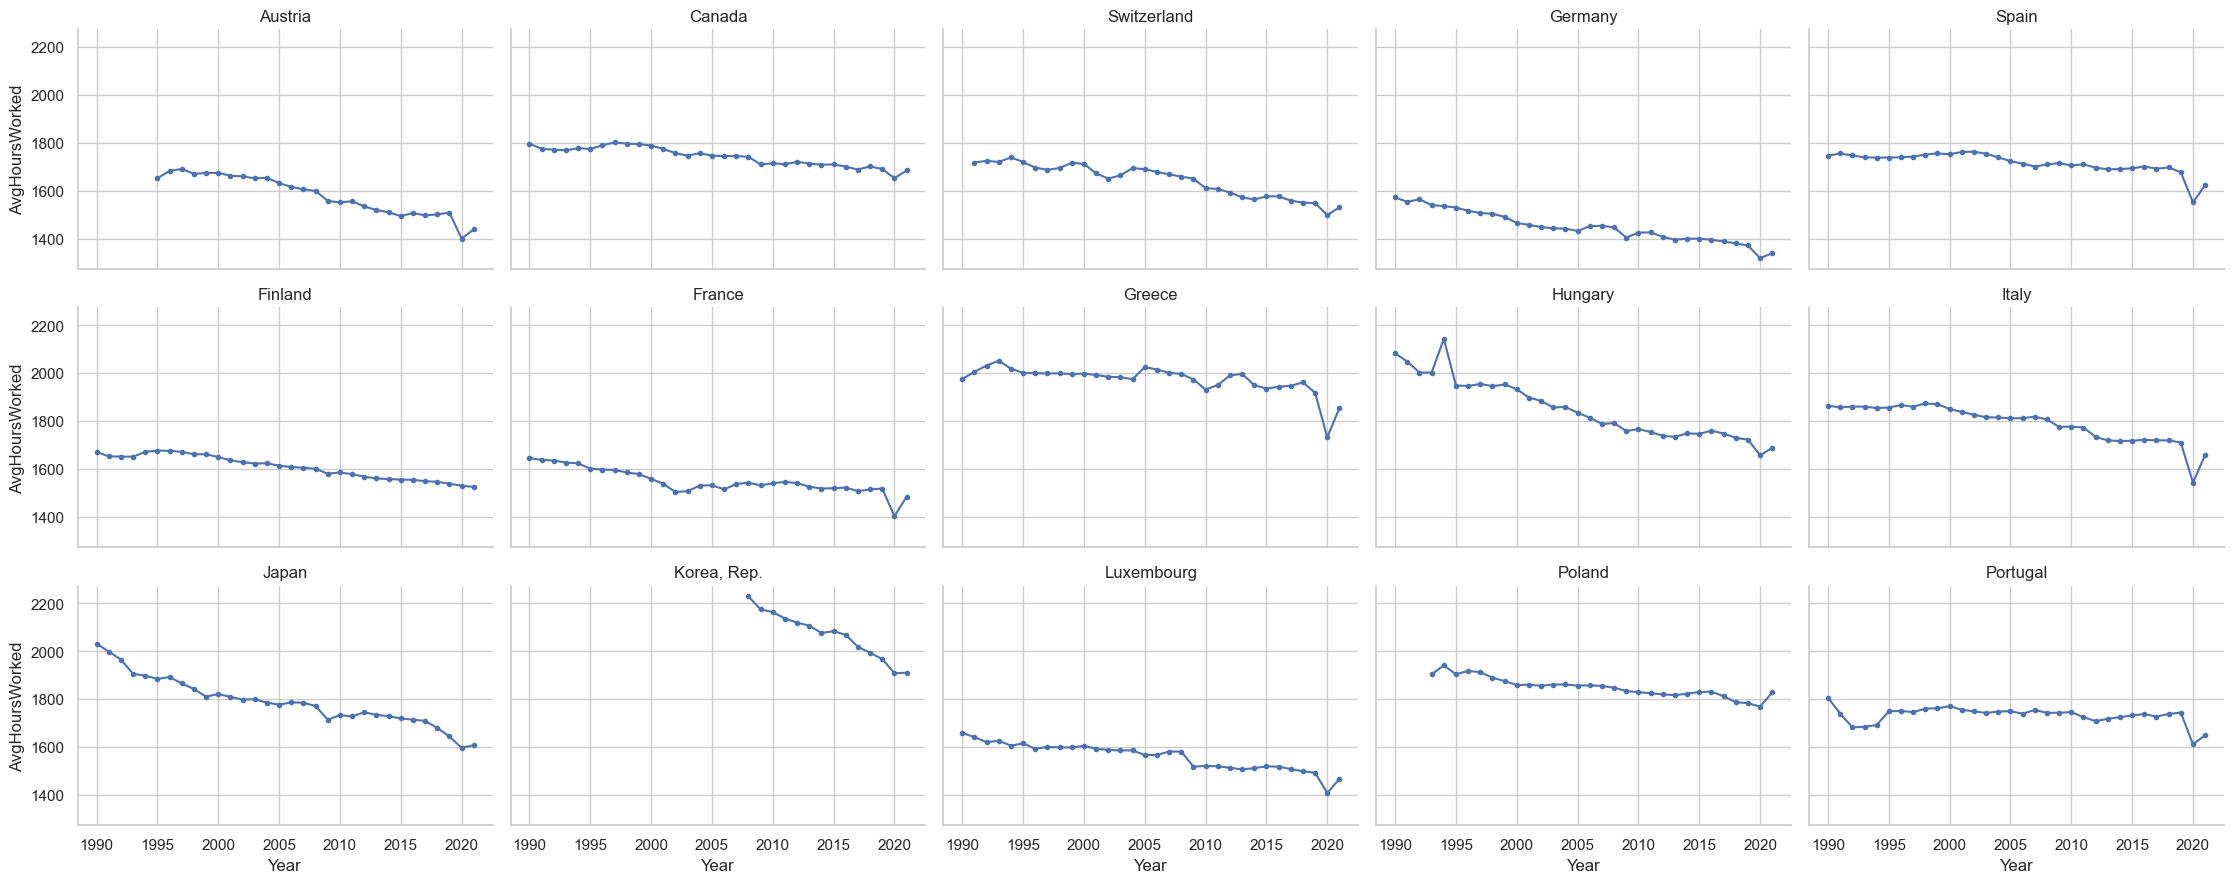

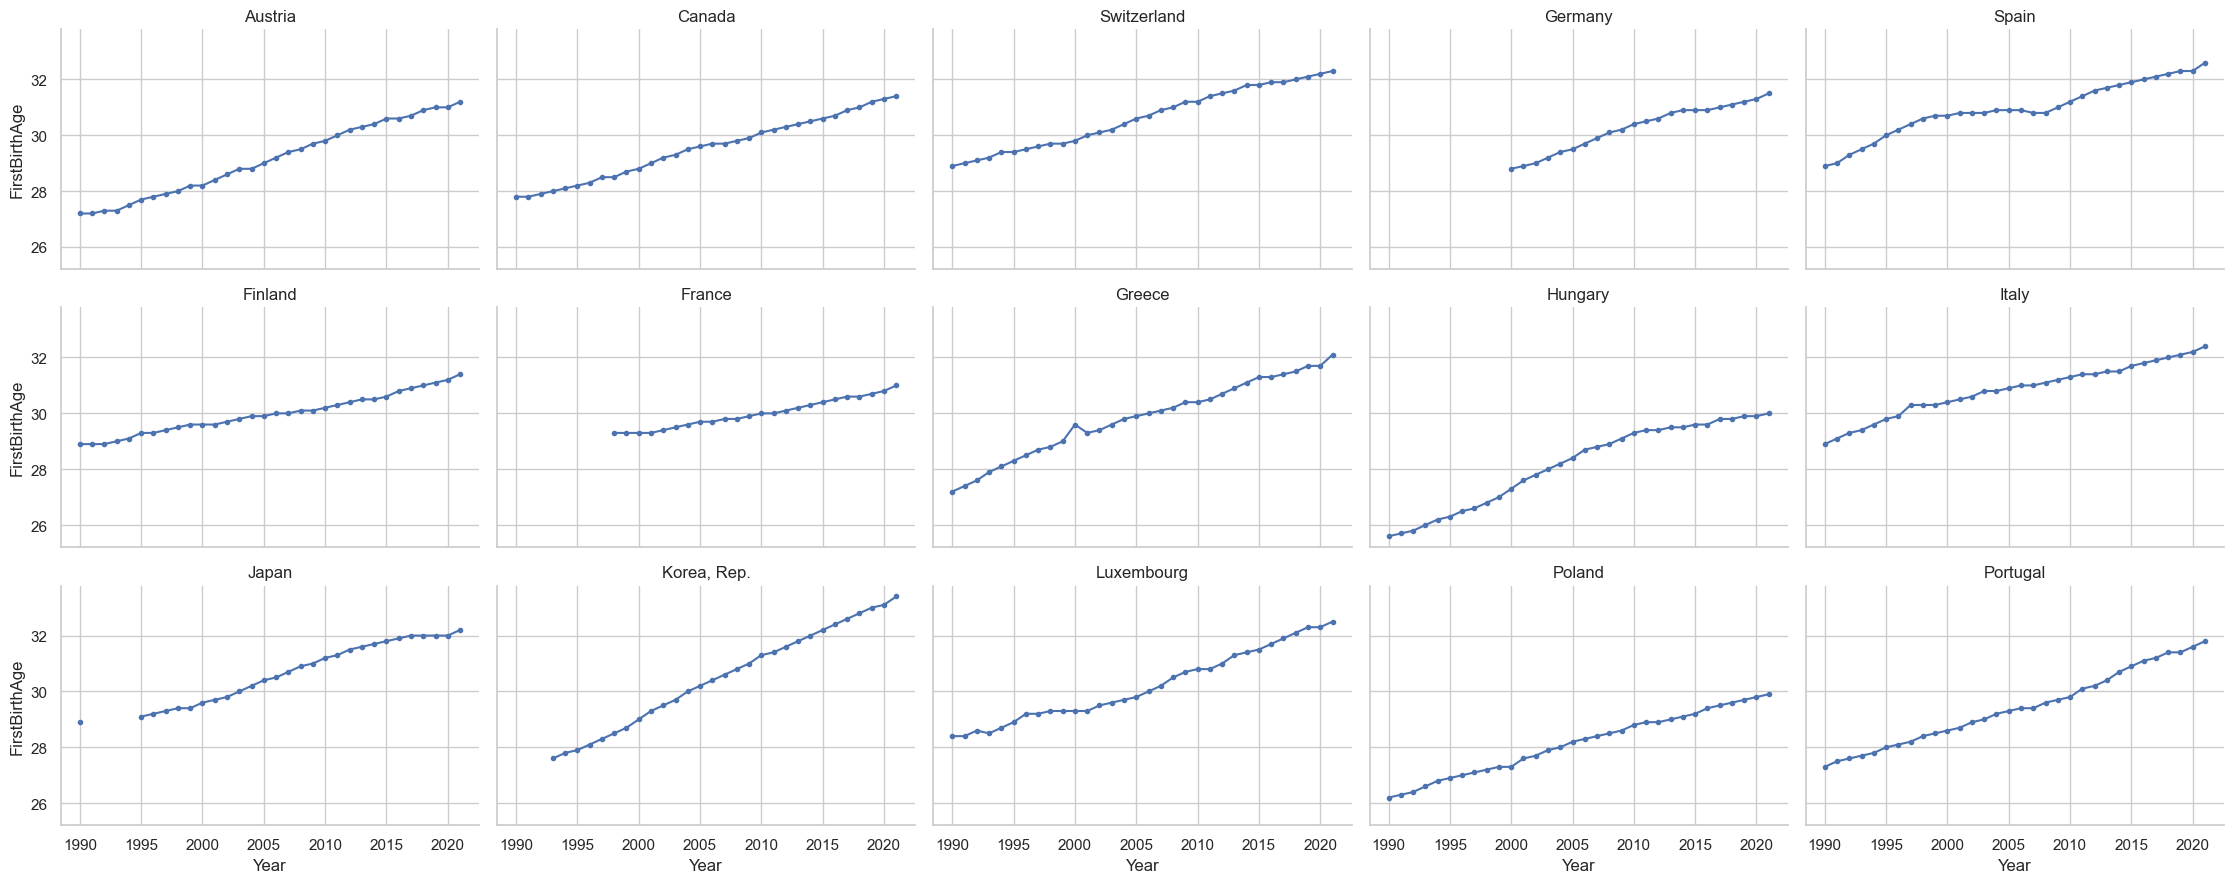

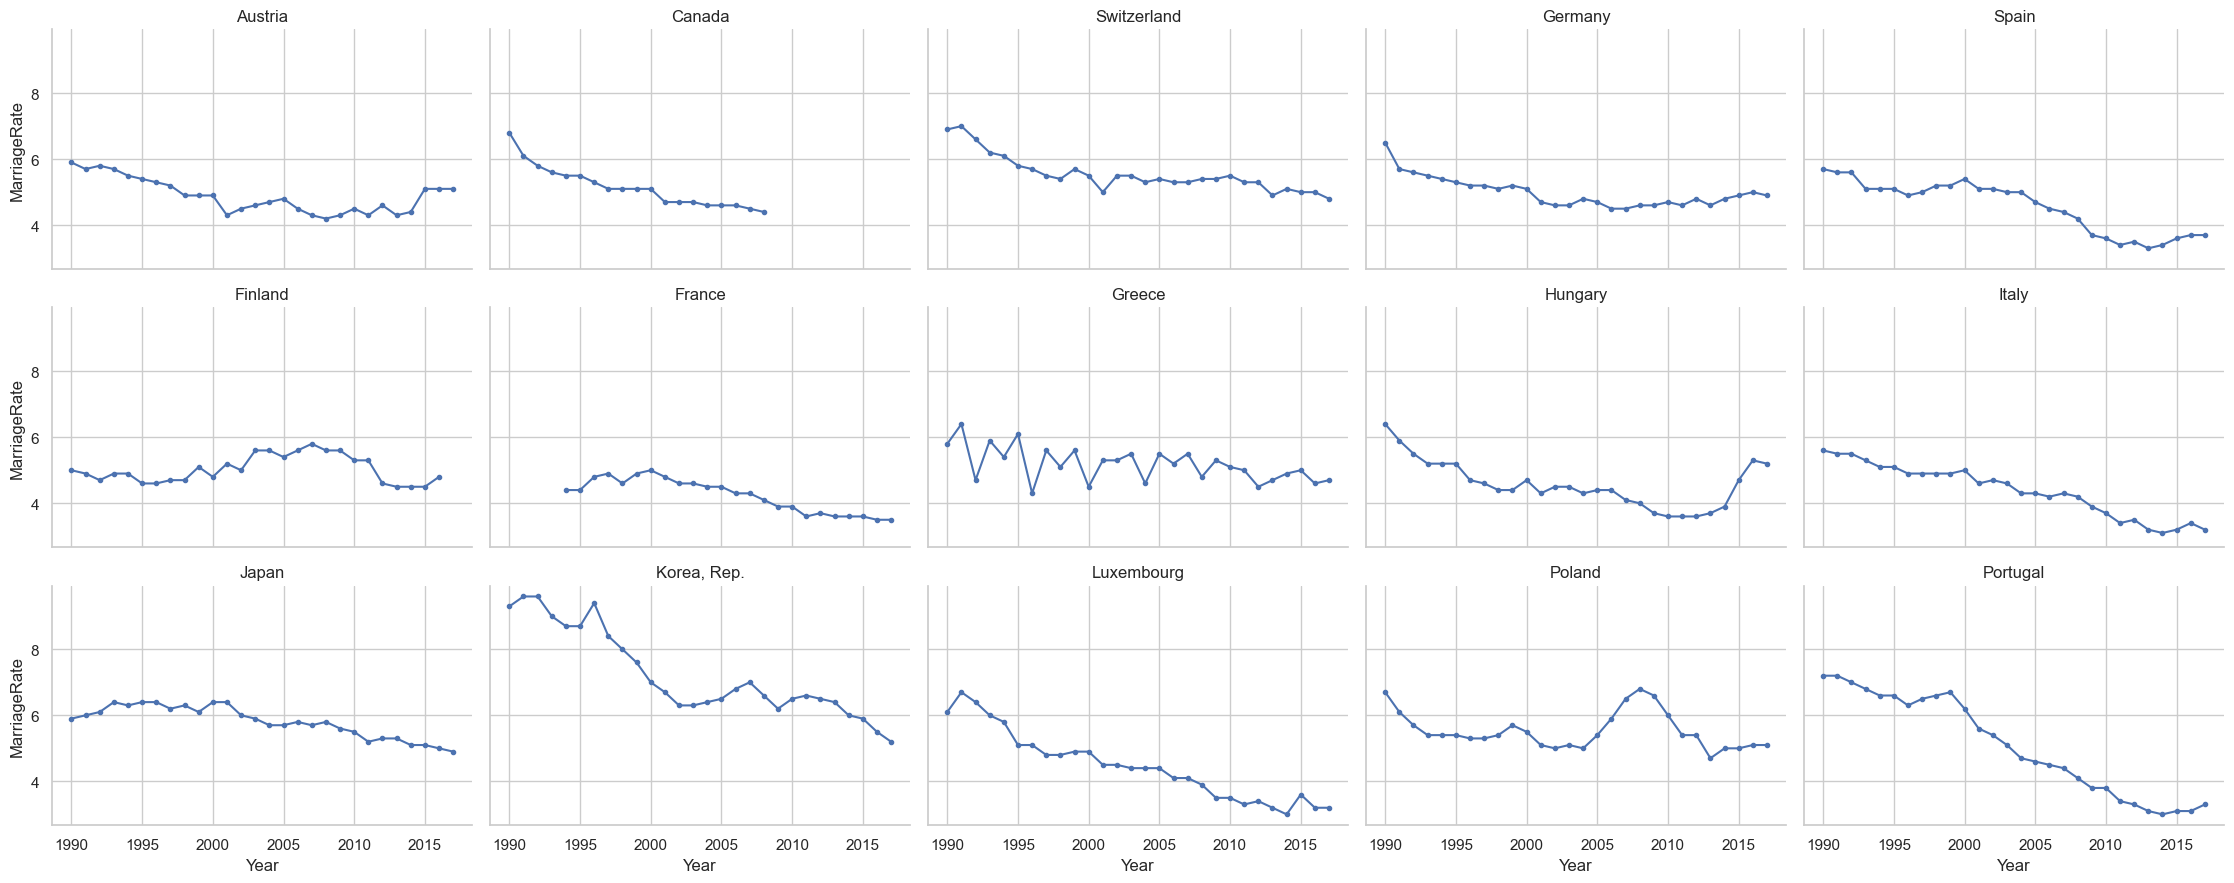

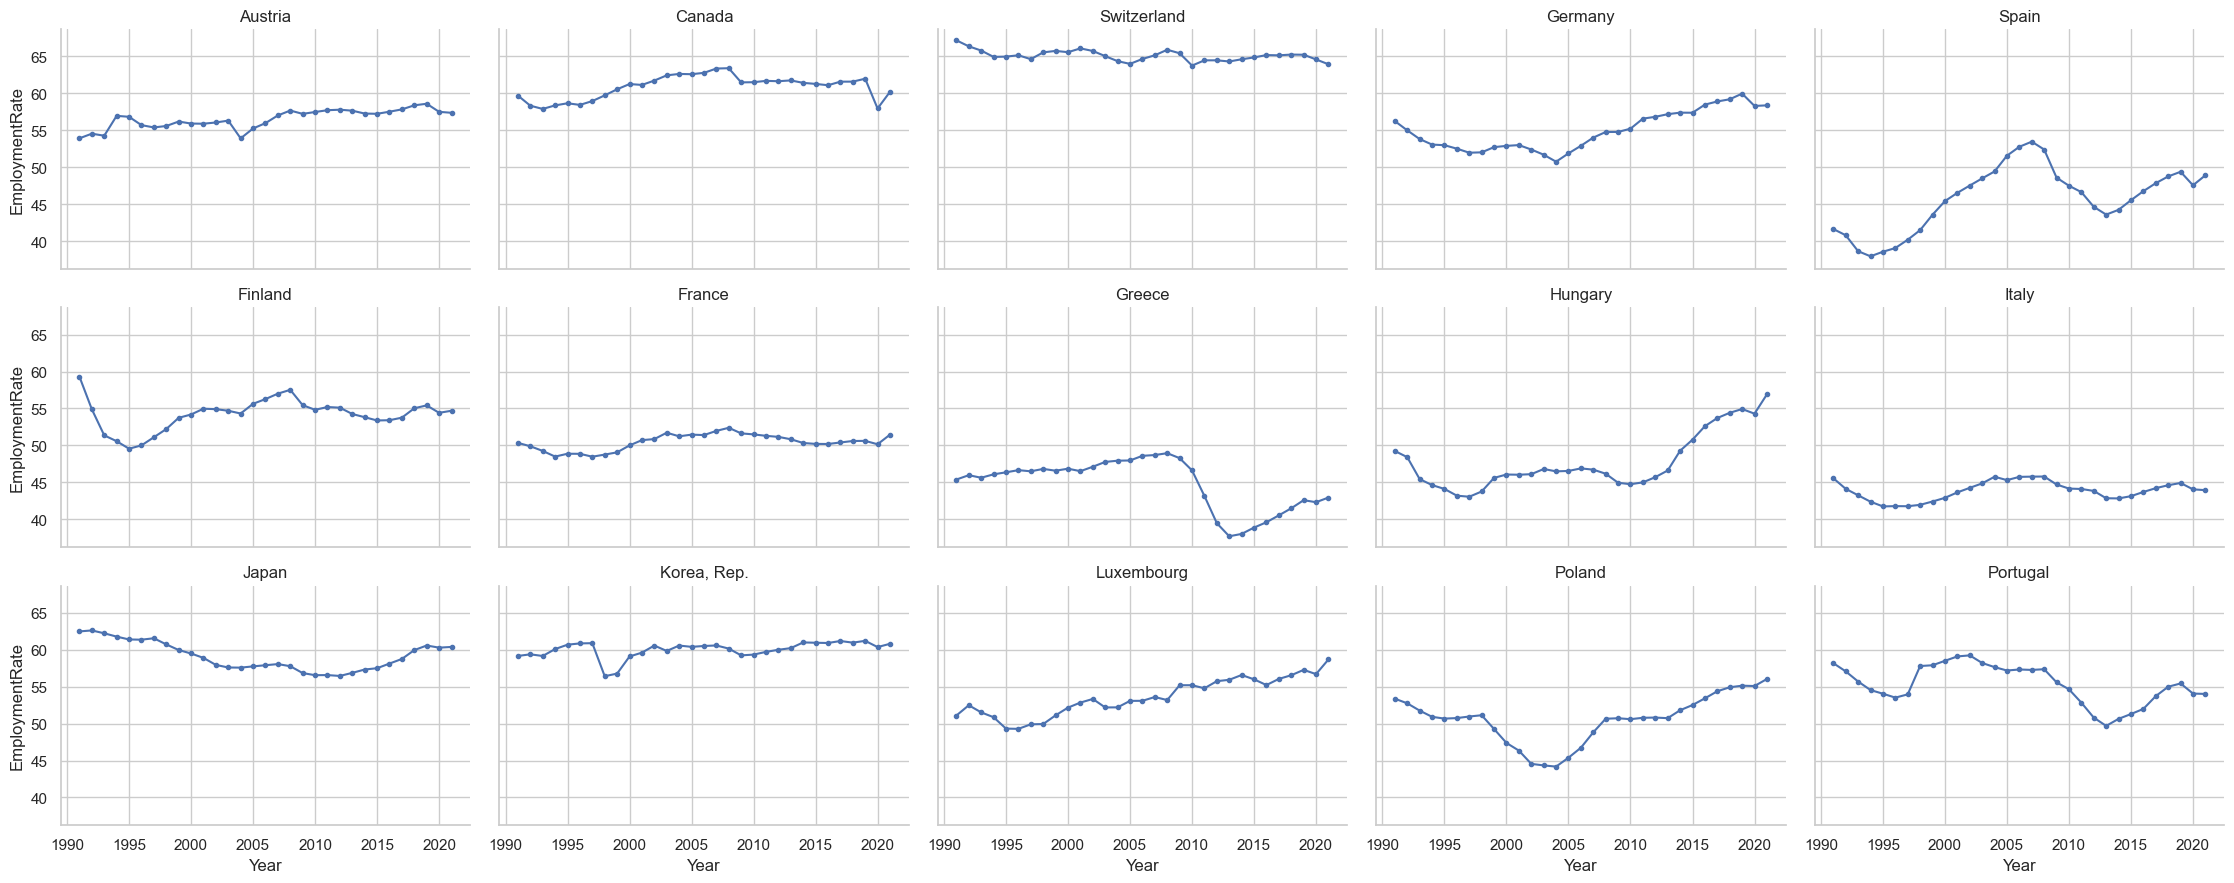

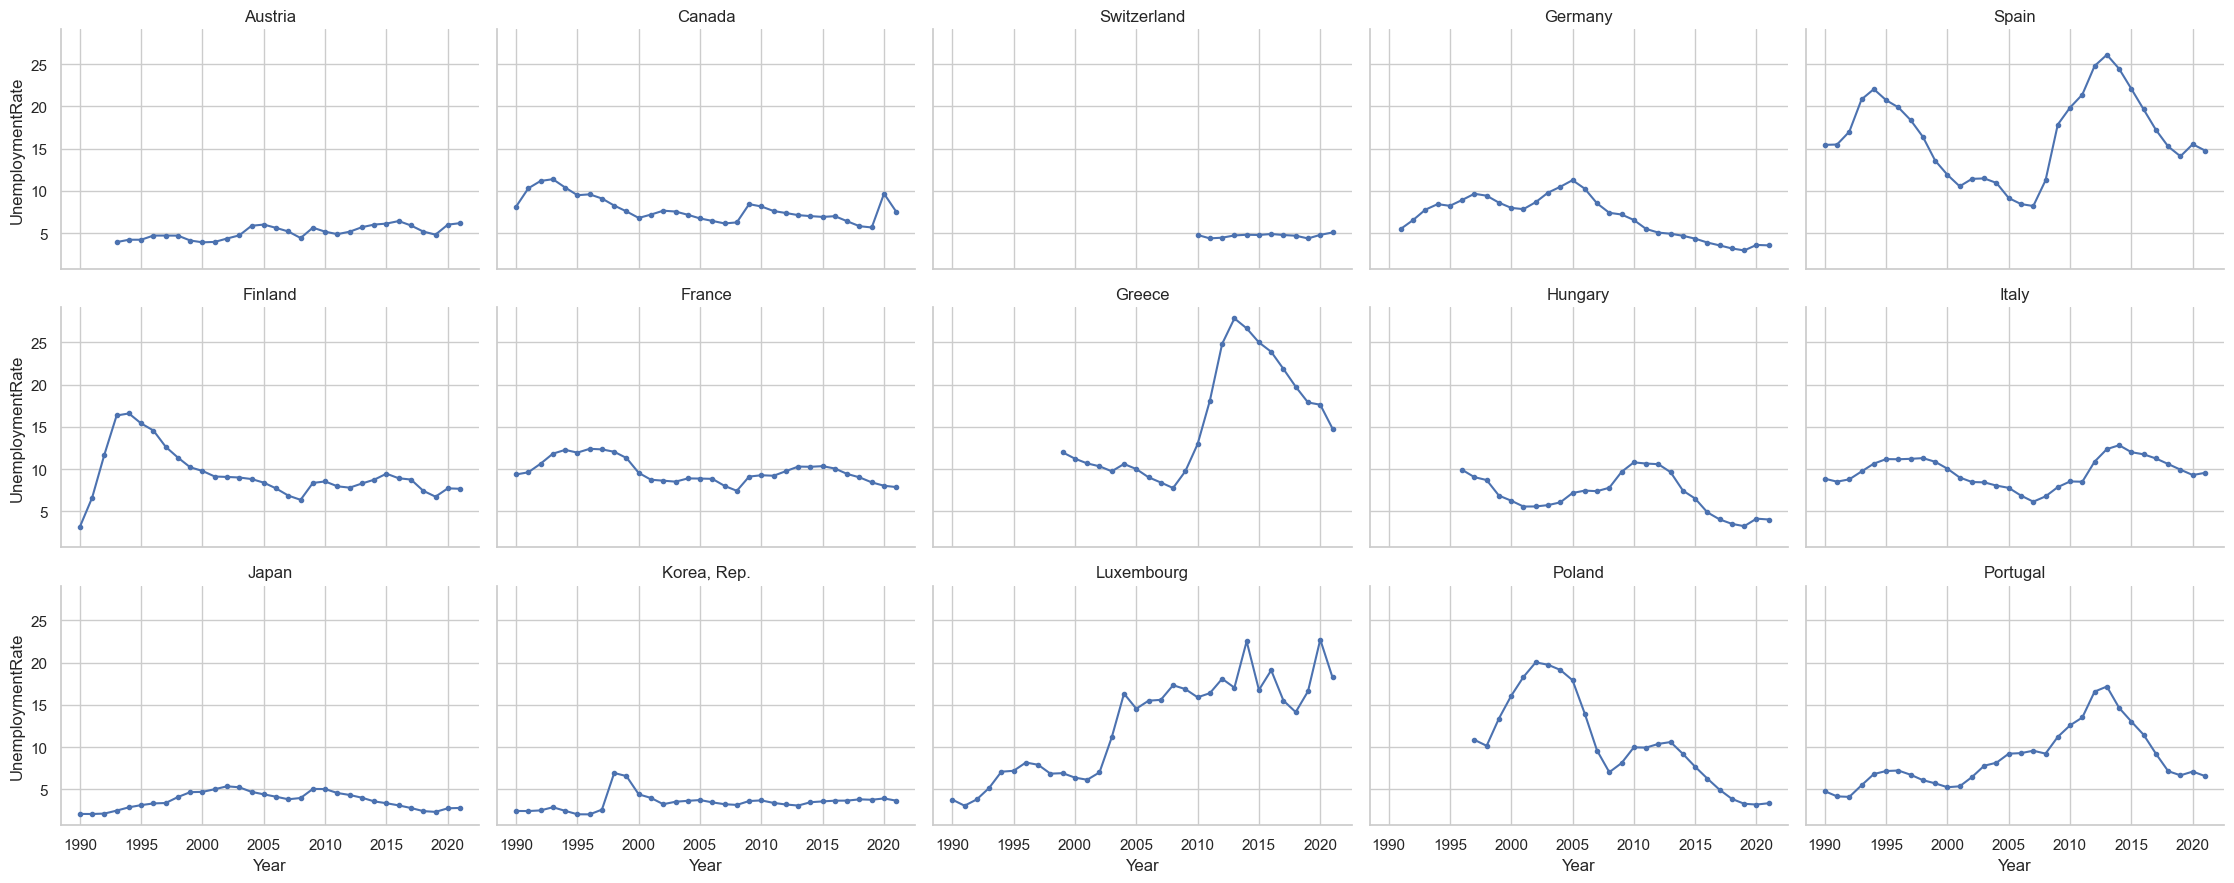

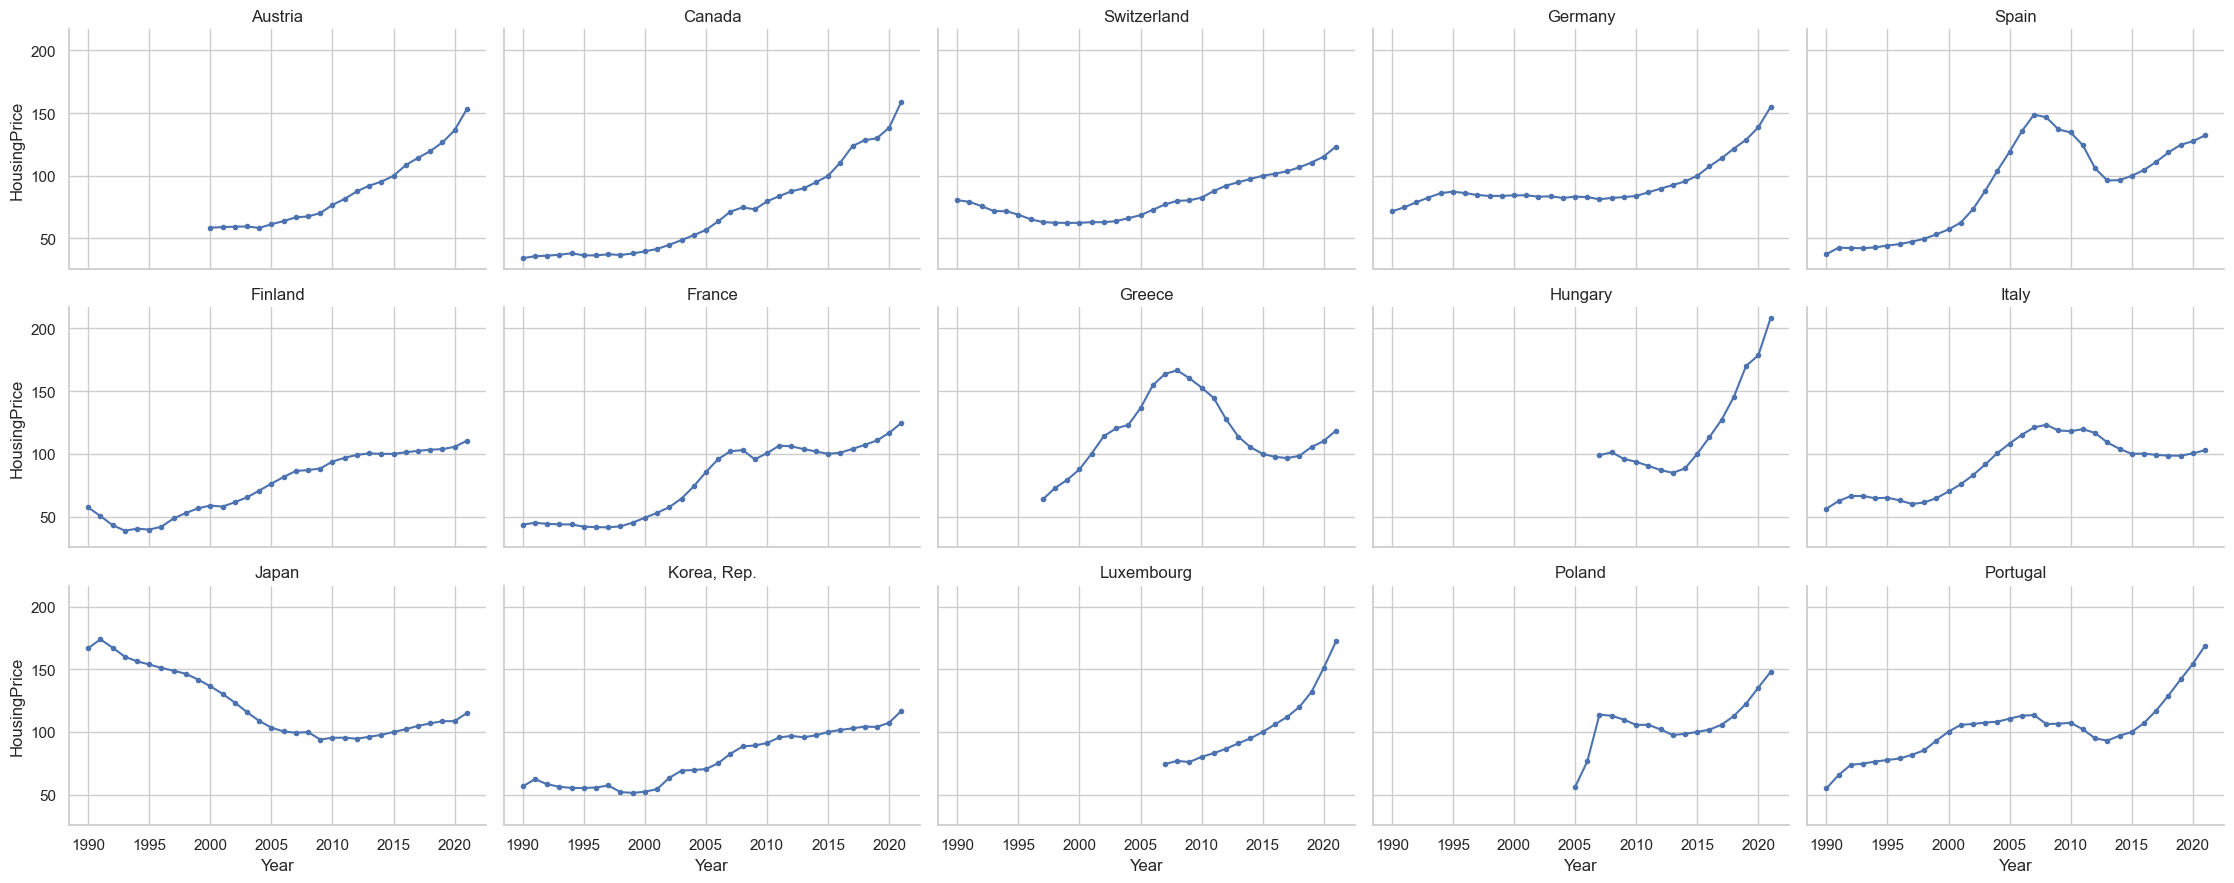

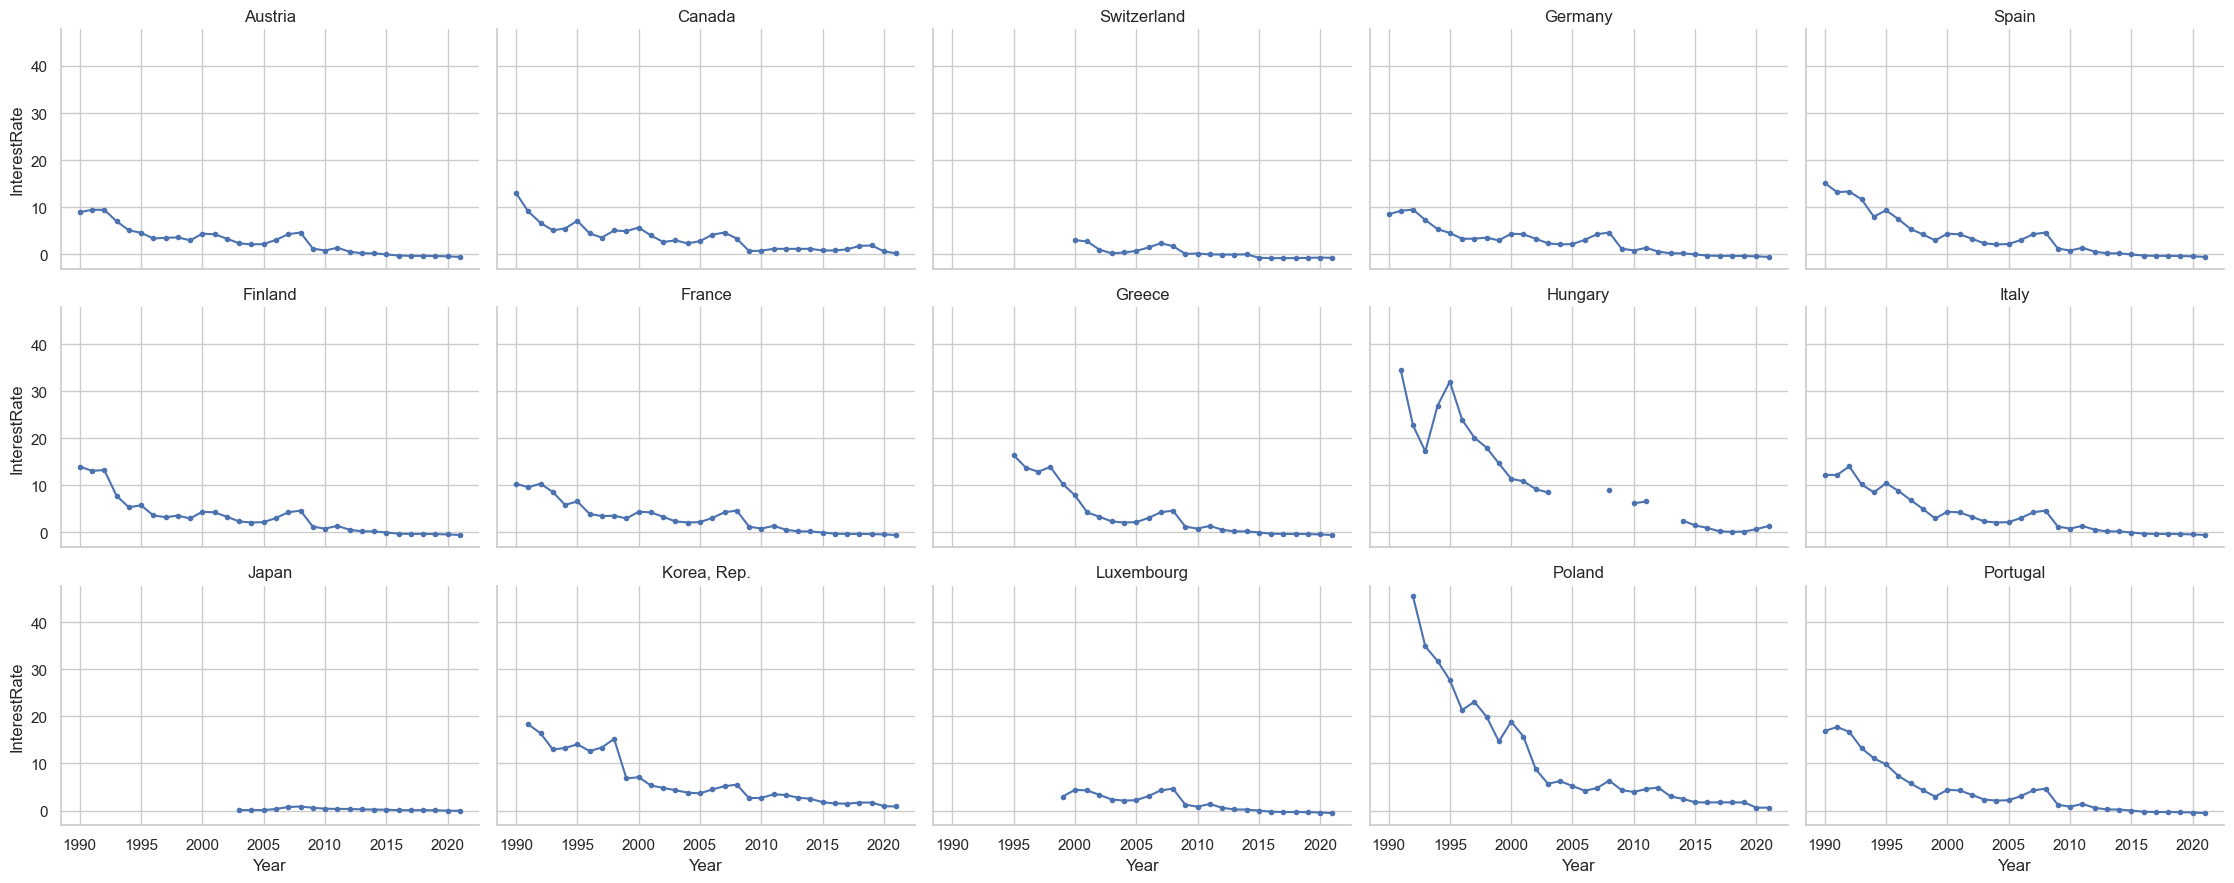

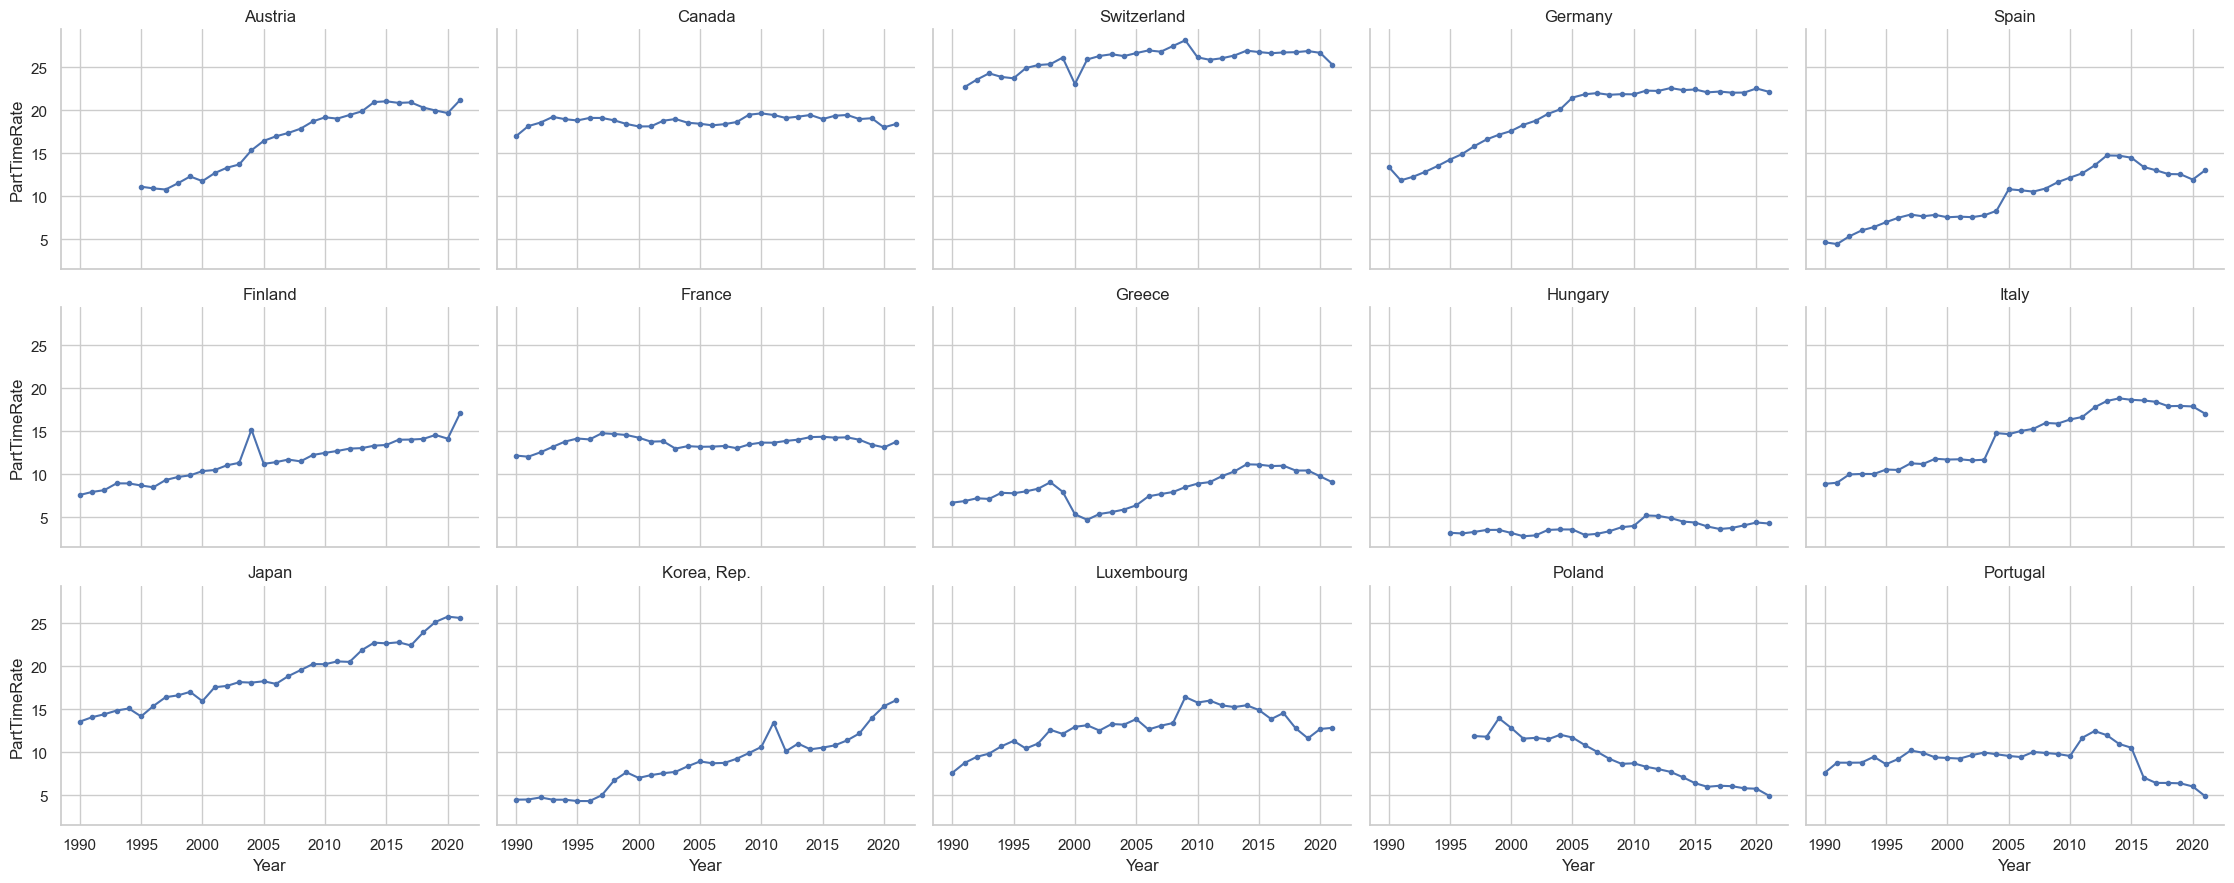

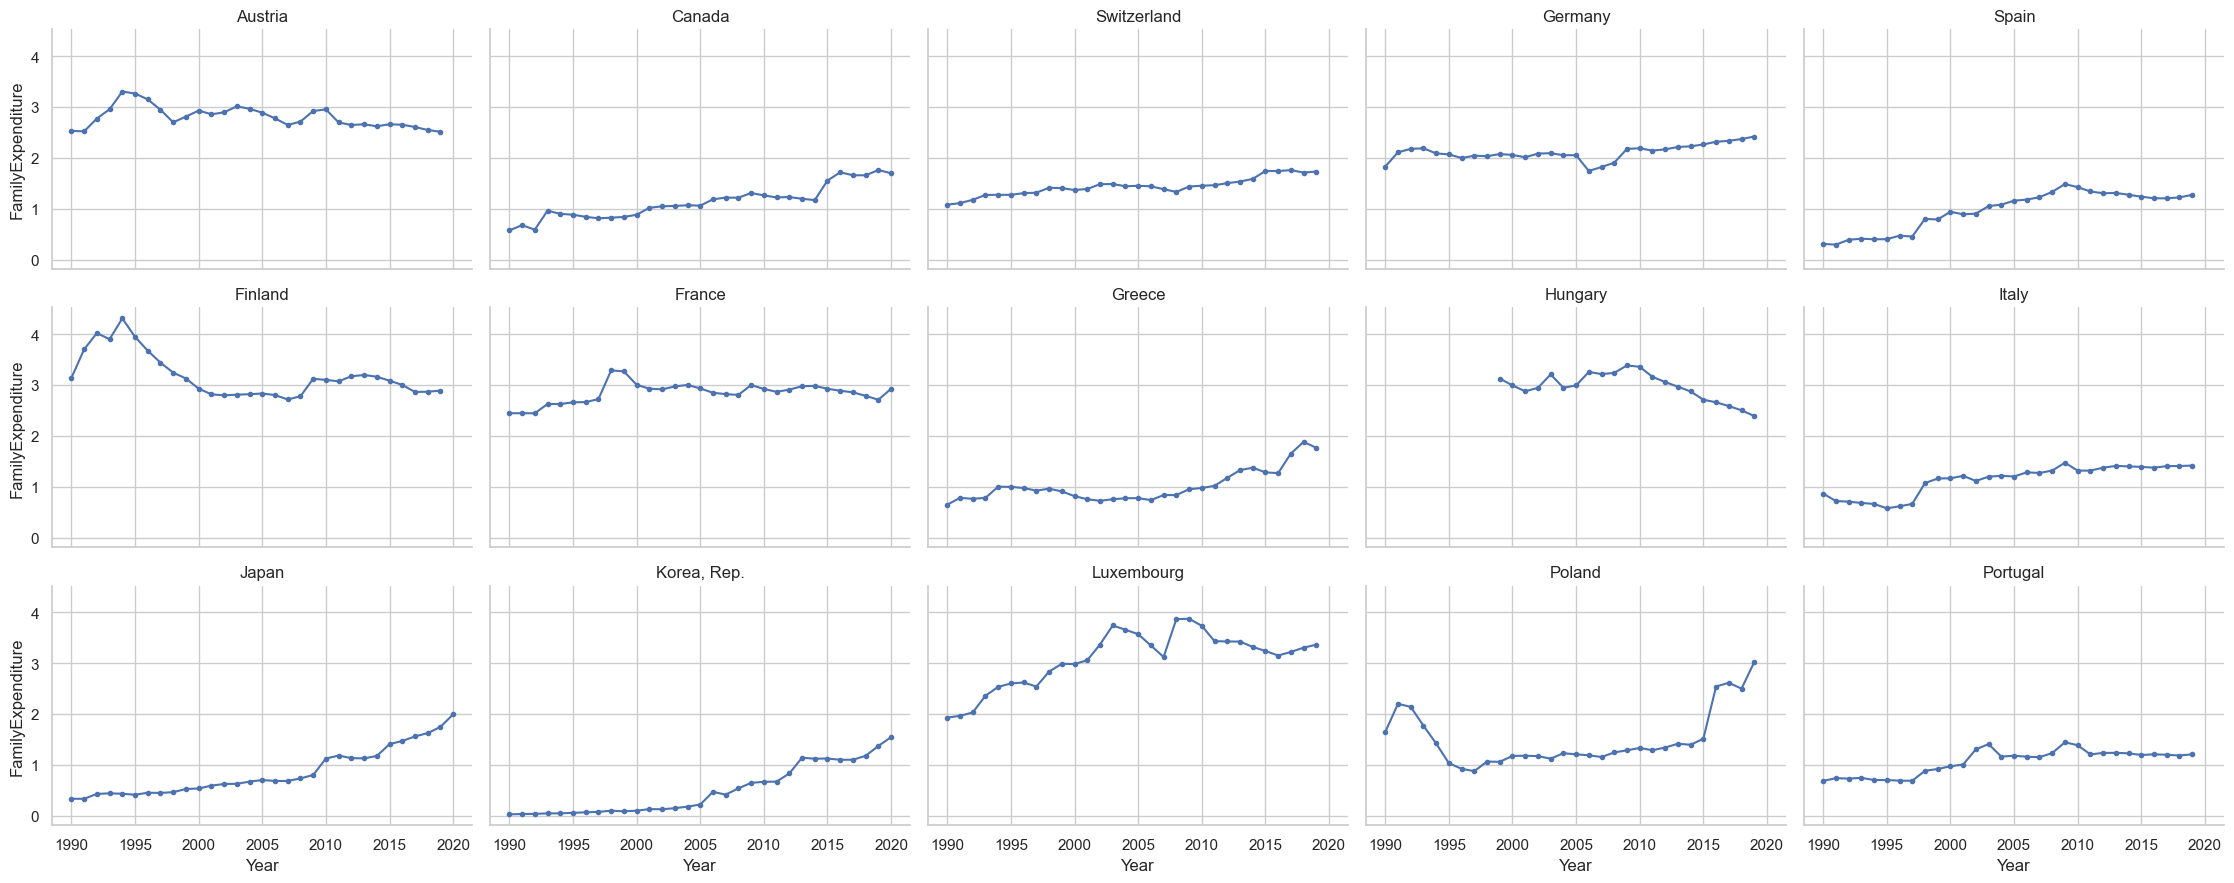

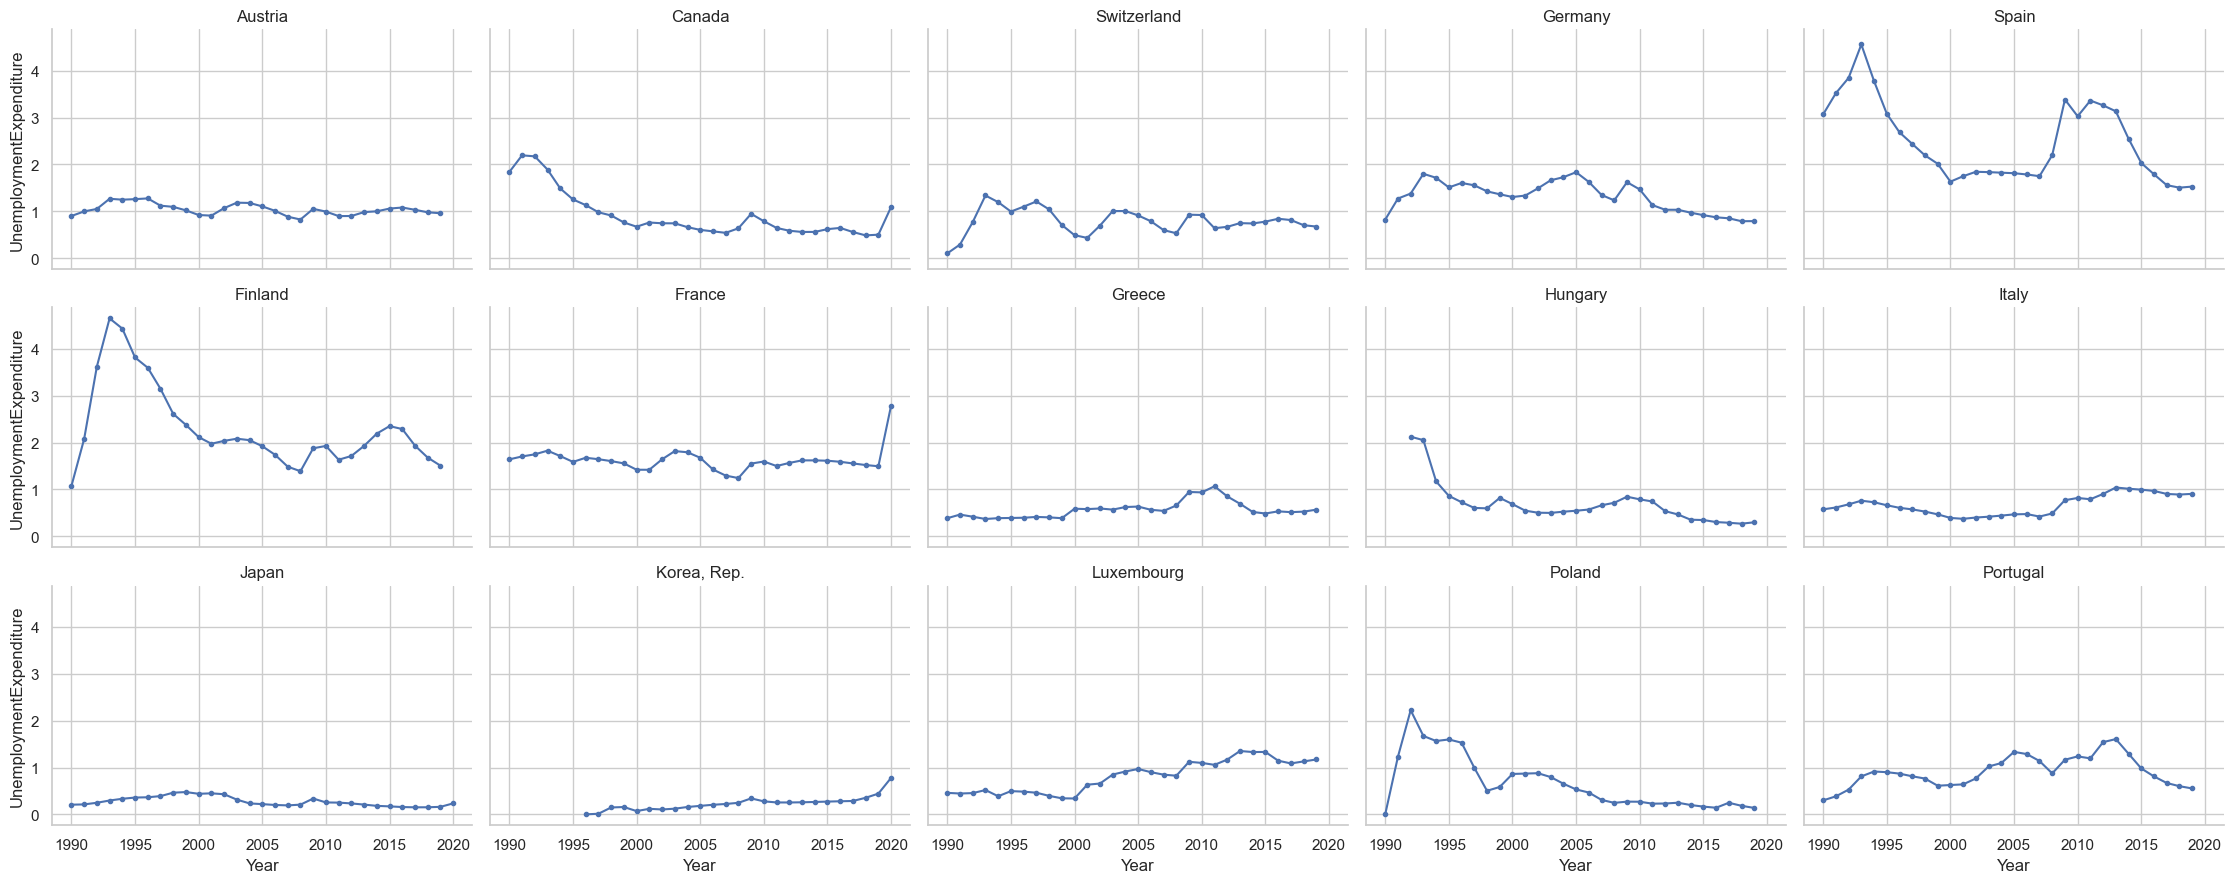

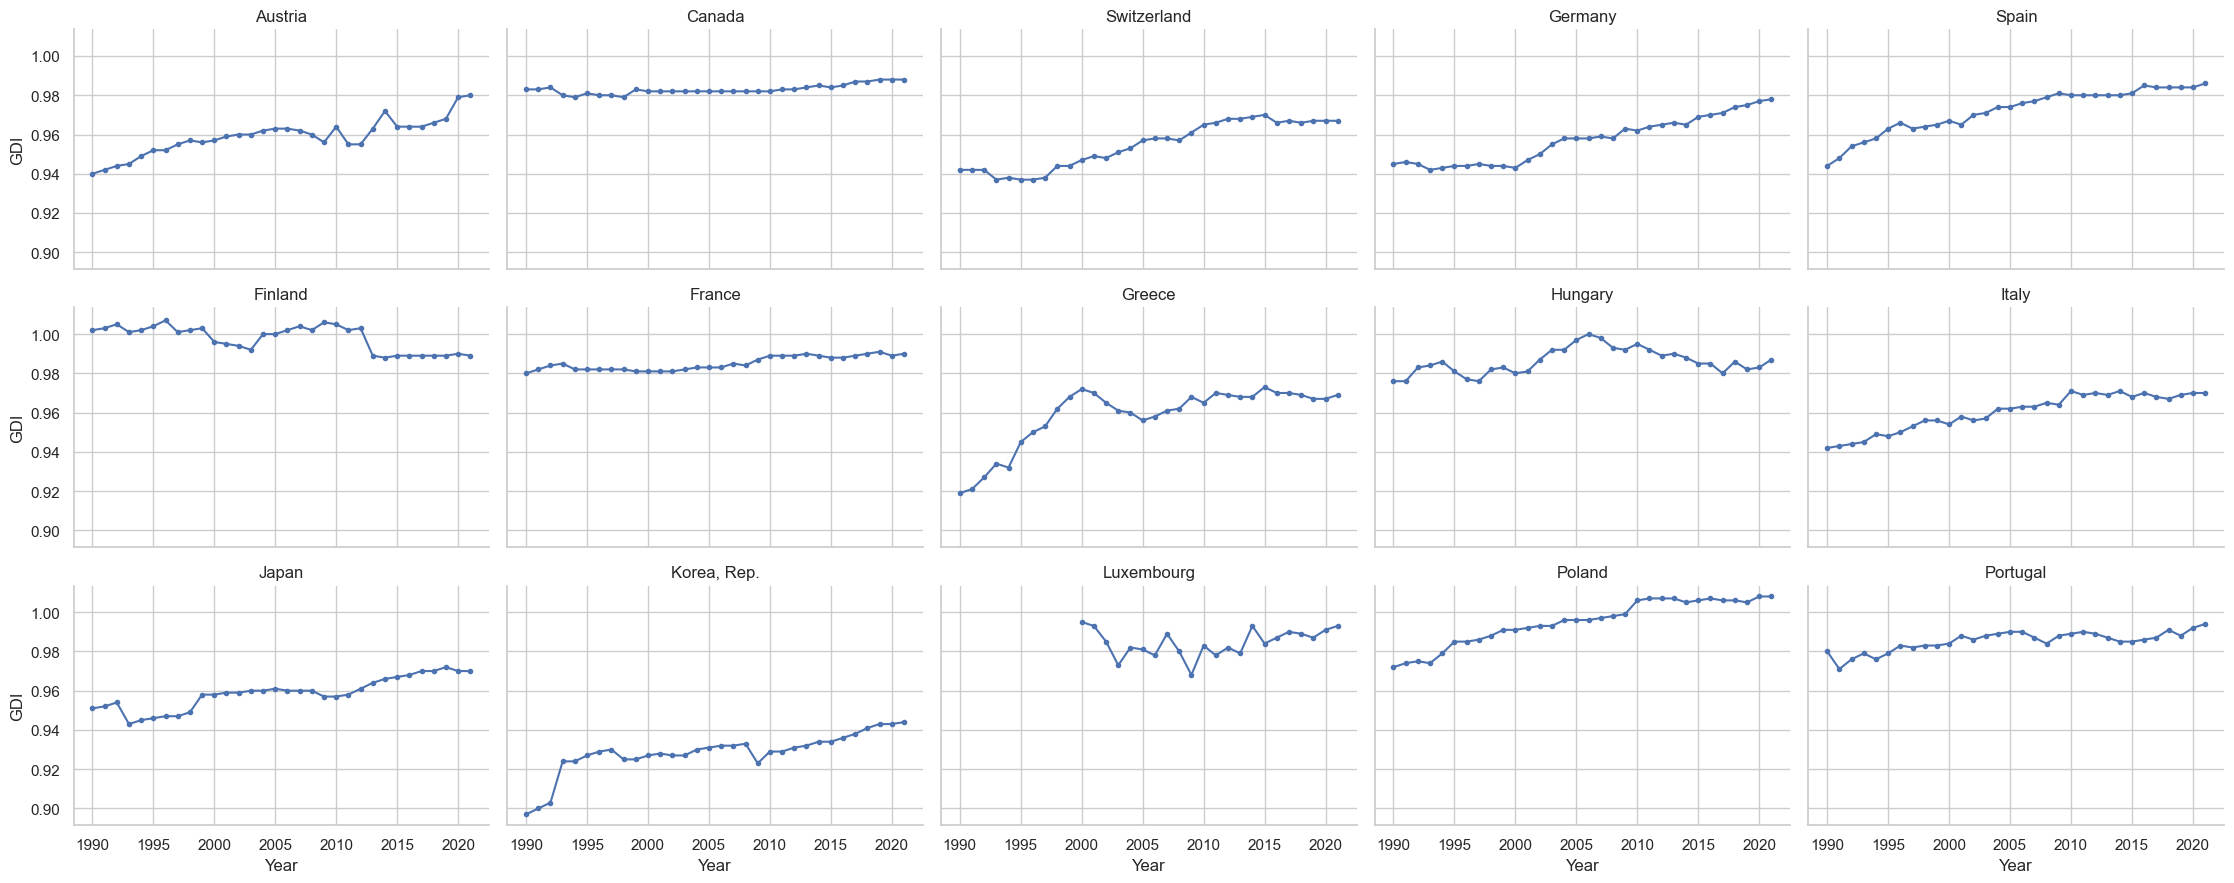

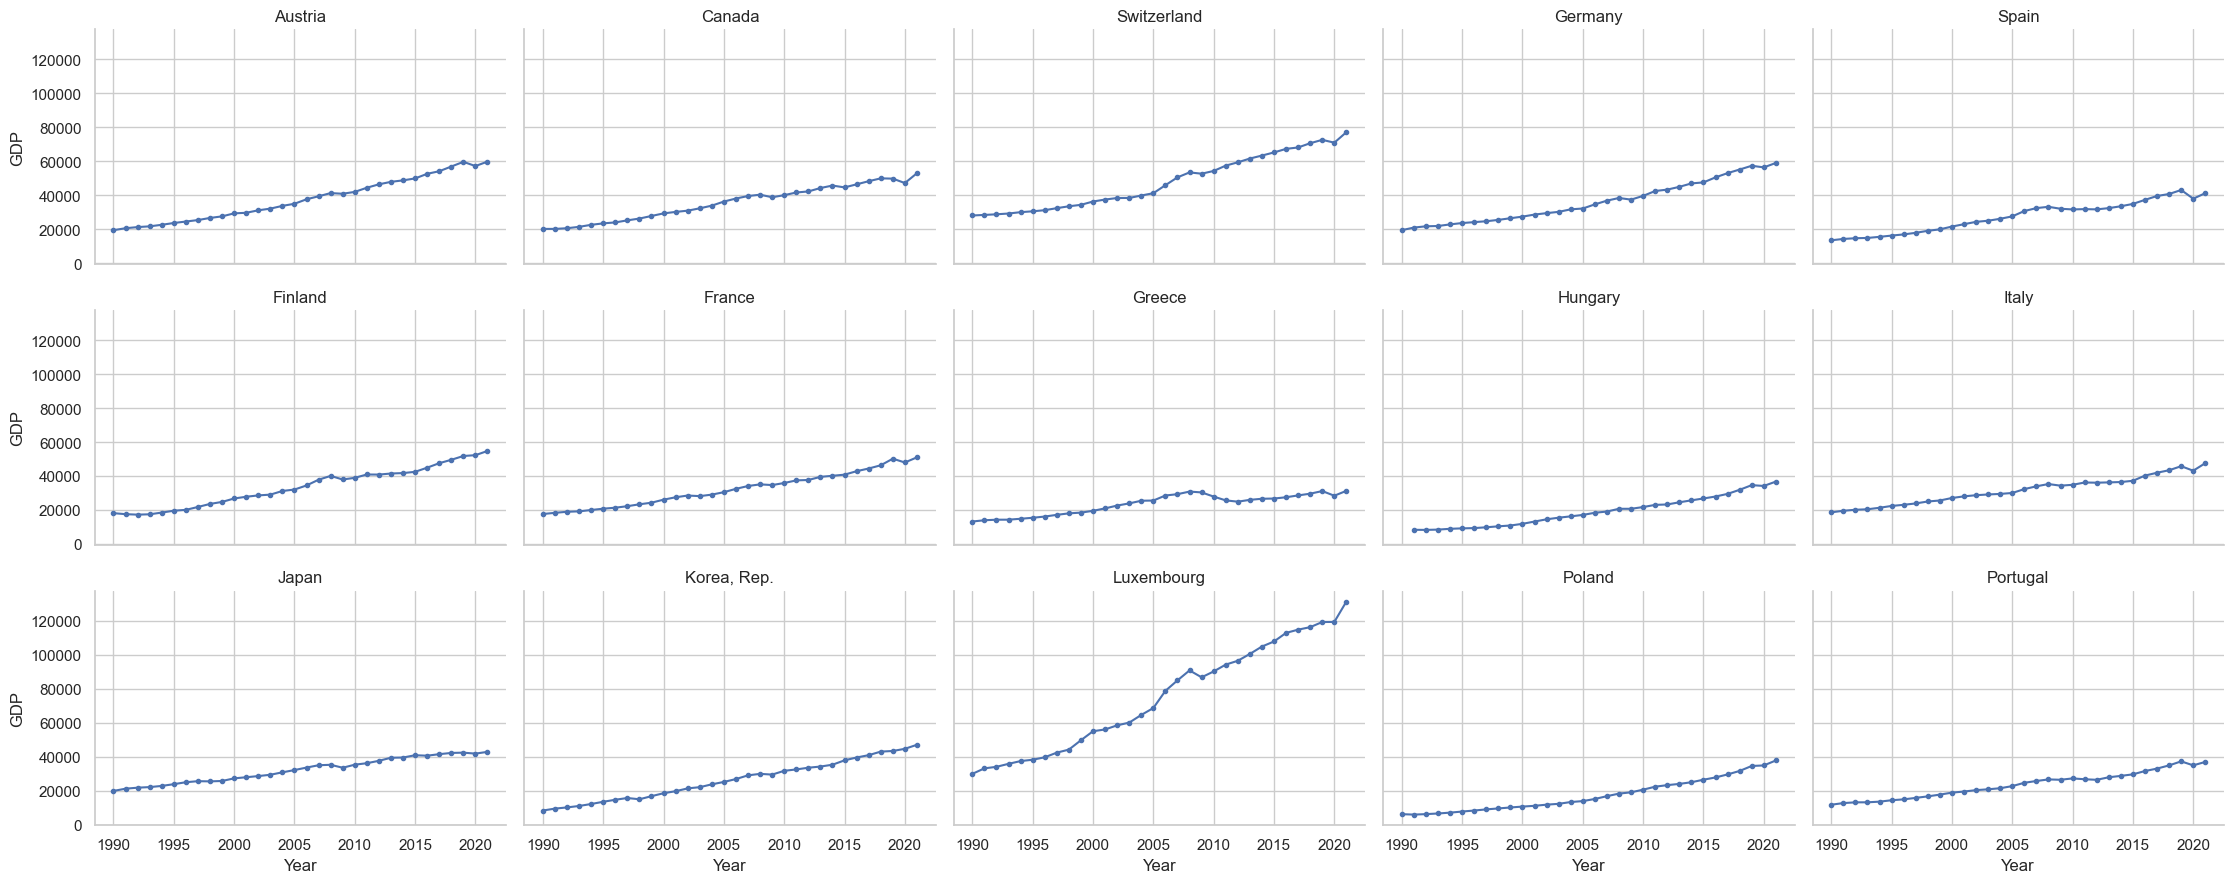

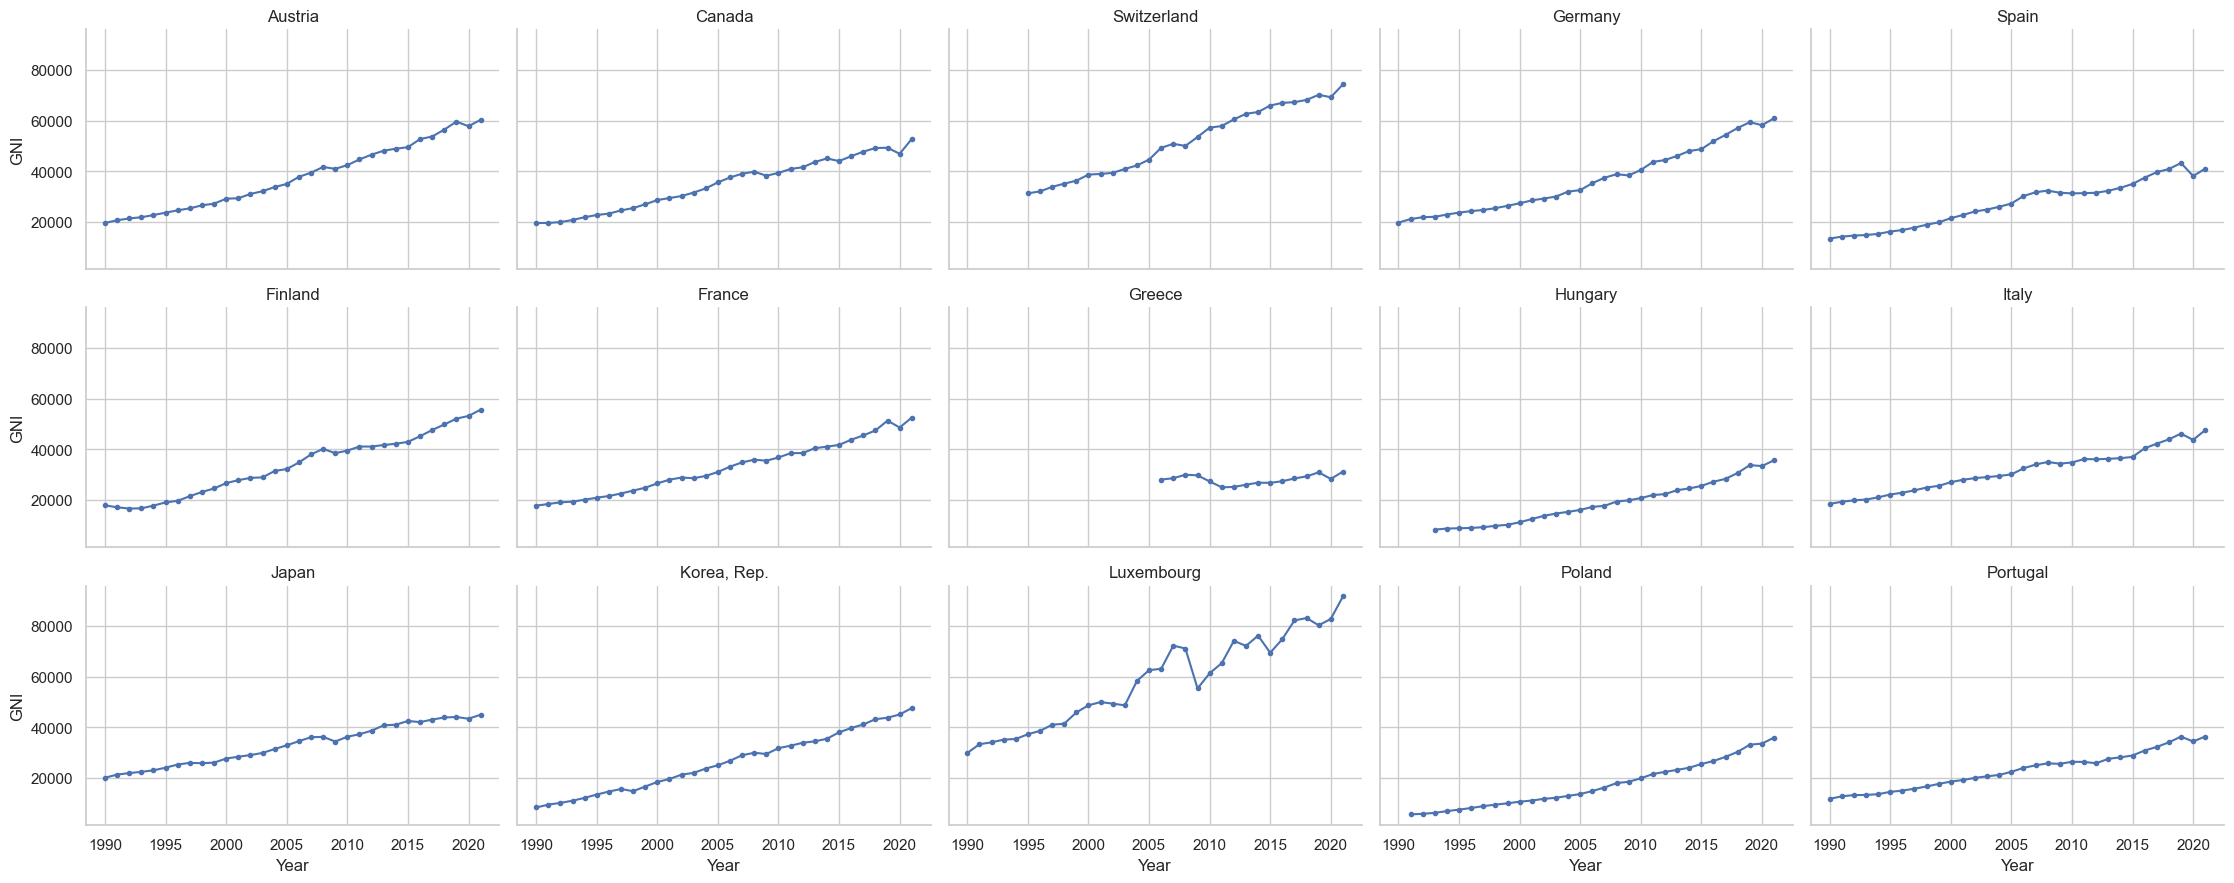

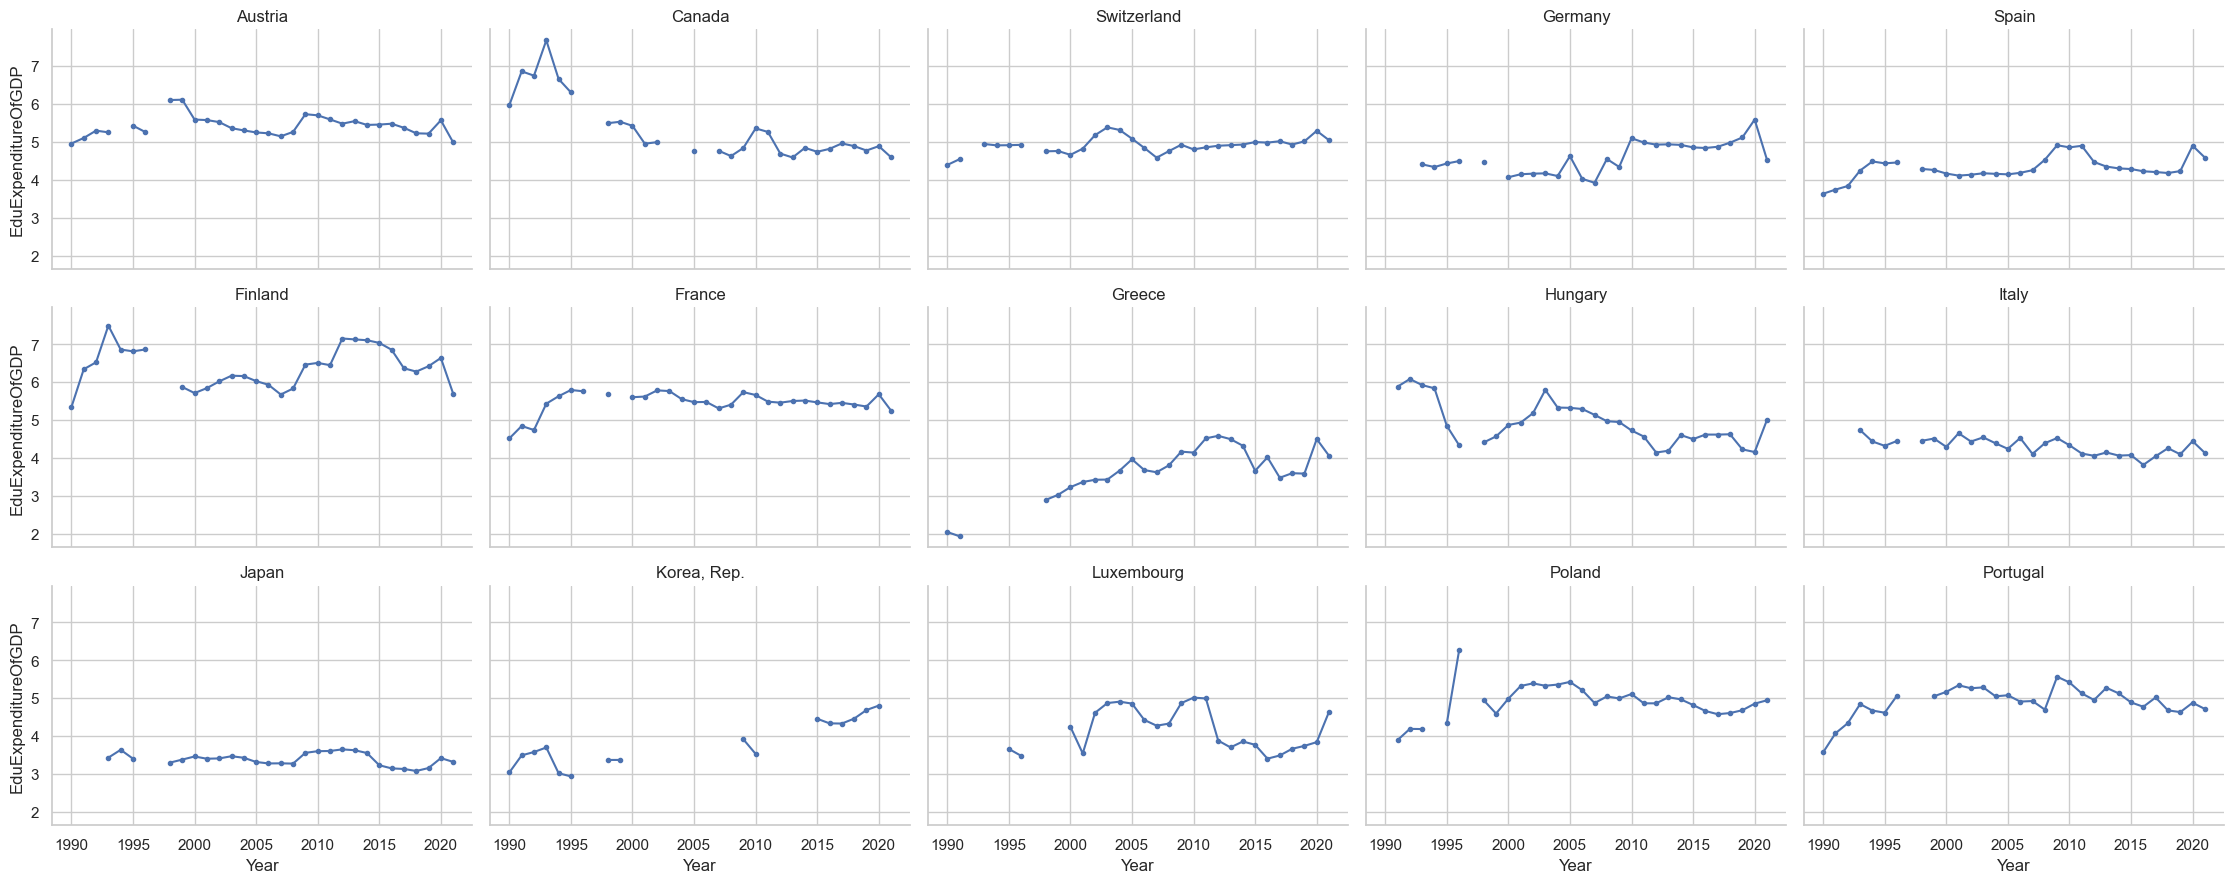

KeyError: "['DivorceRate'] not in index"

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 설정
sns.set(style="whitegrid")

# 'Year' 열이 데이터에 포함되어 있는지 확인
# if 'Year' not in data.columns:
#     # 'Year' 열 추가 필요

# 사용할 피처 리스트 (ID, Country Name, Year 등은 제외)
features = [
    'AvgHoursWorked', 'FirstBirthAge', 'MarriageRate', 'EmploymentRate', 'UnemploymentRate', 'HousingPrice', 'InterestRate', 'PartTimeRate', 'FamilyExpenditure', 'UnemploymentExpenditure', 'GDI', 'GDP', 'GNI', 'EduExpenditureOfGDP', 'DivorceRate']

# 각 피처에 대해 그래프를 그립니다.
for feature in features:
    g = sns.FacetGrid(data, col="Country Name", col_wrap=5, height=3, aspect=1.5)
    g = g.map(plt.plot, "Year", feature, marker=".")

    # 축 이름 설정
    g.set_axis_labels("Year", feature)
    
    # 그래프 타이틀 설정
    g.set_titles("{col_name}")
    
    # 그래프를 표시합니다.
    plt.show()

### 1. 나라별 데이터셋 만들기

In [23]:
countries = data['Country Name'].unique()

for country in countries:
    country_var_name = country.replace(',', '').replace('.', '').replace(' ', '_')
    globals()[f"{country_var_name}_data"] = data[data['Country Name'] == country]

countries

array(['Austria', 'Canada', 'Switzerland', 'Germany', 'Spain', 'Finland',
       'France', 'Greece', 'Hungary', 'Italy', 'Japan', 'Korea, Rep.',
       'Luxembourg', 'Poland', 'Portugal'], dtype=object)

## 2. 나라별 결측치 확인

In [24]:
Austria_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            32 non-null     object 
 1   Year                          32 non-null     int64  
 2   Country Name                  32 non-null     object 
 3   FemaleLaborParticipationRate  32 non-null     float64
 4   AvgHoursWorked                27 non-null     float64
 5   FirstBirthAge                 32 non-null     float64
 6   MarriageRate                  28 non-null     float64
 7   EmploymentRate                31 non-null     float64
 8   UnemploymentRate              29 non-null     float64
 9   HousingPrice                  22 non-null     float64
 10  InterestRate                  32 non-null     float64
 11  PartTimeRate                  27 non-null     float64
 12  FamilyExpenditure             30 non-null     float64
 13  Unemplo

In [25]:
Canada_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 32 to 63
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            32 non-null     object 
 1   Year                          32 non-null     int64  
 2   Country Name                  32 non-null     object 
 3   FemaleLaborParticipationRate  32 non-null     float64
 4   AvgHoursWorked                32 non-null     float64
 5   FirstBirthAge                 32 non-null     float64
 6   MarriageRate                  19 non-null     float64
 7   EmploymentRate                31 non-null     float64
 8   UnemploymentRate              32 non-null     float64
 9   HousingPrice                  32 non-null     float64
 10  InterestRate                  32 non-null     float64
 11  PartTimeRate                  32 non-null     float64
 12  FamilyExpenditure             31 non-null     float64
 13  Unempl

In [26]:
Switzerland_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 64 to 95
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            32 non-null     object 
 1   Year                          32 non-null     int64  
 2   Country Name                  32 non-null     object 
 3   FemaleLaborParticipationRate  32 non-null     float64
 4   AvgHoursWorked                31 non-null     float64
 5   FirstBirthAge                 32 non-null     float64
 6   MarriageRate                  28 non-null     float64
 7   EmploymentRate                31 non-null     float64
 8   UnemploymentRate              12 non-null     float64
 9   HousingPrice                  32 non-null     float64
 10  InterestRate                  22 non-null     float64
 11  PartTimeRate                  31 non-null     float64
 12  FamilyExpenditure             30 non-null     float64
 13  Unempl

## 3. 나라별 자동화 시계열 함수 사용하여 결측치 채우기

In [27]:
import pandas as pd
import numpy as np

def interpolate_with_direction(column):
    if column.isna().iloc[0] and column.isna().iloc[-1]:
        # 양 끝이 모두 NaN인 경우: 양방향 보간
        return column.interpolate(method='time', limit_direction='both')
    elif column.isna().iloc[0]:
        # 시작 부분이 NaN인 경우: 앞에서 뒤로 보간
        return column.interpolate(method='time', limit_direction='backward')
    elif column.isna().iloc[-1]:
        # 끝 부분이 NaN인 경우: 뒤에서 앞으로 보간
        return column.interpolate(method='time', limit_direction='forward')
    else:
        # 중간에 NaN이 있는 경우: 기본 보간
        return column.interpolate(method='time')

# 나라별 데이터셋 리스트
country_data_list = [
    Austria_data,
    Canada_data,
    Switzerland_data,
    Germany_data,
    Spain_data,
    Finland_data,
    France_data,
    Greece_data,
    Hungary_data,
    Italy_data,
    Japan_data,
    Korea_Rep_data,
    Luxembourg_data,
    Poland_data,
    Portugal_data
]

# 각 데이터셋에 대해 결측치 보간
for dataset in country_data_list:
    dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')
    dataset.set_index('Year', inplace=True)
    
    # 열별로 결측치 패턴에 따라 보간을 적용
    for column in dataset.columns:
        dataset[column] = interpolate_with_direction(dataset[column])
    
    # 필요하다면, 인덱스를 다시 리셋할 수 있습니다.
    # dataset.reset_index(inplace=True)


C:\Users\sehong\AppData\Local\Temp\ipykernel_9172\2618759843.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')
C:\Users\sehong\AppData\Local\Temp\ipykernel_9172\2618759843.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = interpolate_with_direction(dataset[column])
C:\Users\sehong\AppData\Local\Temp\ipykernel_9172\2618759843.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

## 4. 결측치 채워졌는지 확인

In [28]:
    Austria_data.info()
    Canada_data.info()
    Switzerland_data.info()
    Germany_data.info()
    Spain_data.info()
    Finland_data.info()
    France_data.info()
    Greece_data.info()
    Hungary_data.info()
    Italy_data.info()
    Japan_data.info()
    Korea_Rep_data.info()
    Luxembourg_data.info()
    Poland_data.info()
    Portugal_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 1990-01-01 to 2021-01-01
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            32 non-null     object 
 1   Country Name                  32 non-null     object 
 2   FemaleLaborParticipationRate  32 non-null     float64
 3   AvgHoursWorked                32 non-null     float64
 4   FirstBirthAge                 32 non-null     float64
 5   MarriageRate                  32 non-null     float64
 6   EmploymentRate                32 non-null     float64
 7   UnemploymentRate              32 non-null     float64
 8   HousingPrice                  32 non-null     float64
 9   InterestRate                  32 non-null     float64
 10  PartTimeRate                  32 non-null     float64
 11  FamilyExpenditure             32 non-null     float64
 12  UnemploymentExpenditure       32 non-null     

# 5. 나라별 데이터 원래 데이터로 합치기

In [29]:
data_frames = [    Austria_data,
    Canada_data,
    Switzerland_data,
    Germany_data,
    Spain_data,
    Finland_data,
    France_data,
    Greece_data,
    Hungary_data,
    Italy_data,
    Japan_data,
    Korea_Rep_data,
    Luxembourg_data,
    Poland_data,
    Portugal_data]

# 데이터 프레임을 하나로 합치기
merged_df = pd.concat(data_frames, ignore_index=True)

# 결과 확인
merged_df

,ID,Country Name,FemaleLaborParticipationRate,AvgHoursWorked,FirstBirthAge,MarriageRate,EmploymentRate,UnemploymentRate,HousingPrice,InterestRate,...,FamilyExpenditure,UnemploymentExpenditure,GDI,GDP,GNI,EduExpenditureOfGDP,TotalLaborParticipationRate,InflationRate,Population,FertilityRate
0,AUT1990,Austria,55.172,1652.679,27.2,5.9,53.930,3.958333,58.583861,8.964167,...,2.530,0.901,0.940,19473.072125,19561.545708,4.957250,67.429,3.261872,7677850.0,1.46
1,AUT1991,Austria,55.979,1652.679,27.2,5.7,53.930,3.958333,58.583861,9.463333,...,2.521,0.999,0.942,20617.579156,20602.091660,5.103220,67.959,3.337426,7754891.0,1.51
2,AUT1992,Austria,57.604,1652.679,27.3,5.8,54.558,3.958333,58.583861,9.460000,...,2.773,1.051,0.944,21293.268400,21345.923456,5.296980,68.839,4.020847,7840709.0,1.51
3,AUT1993,Austria,58.208,1652.679,27.3,5.7,54.281,3.958333,58.583861,7.023334,...,2.956,1.268,0.945,21732.871184,21793.075303,5.252000,68.986,3.631786,7905632.0,1.50
4,AUT1994,Austria,61.895,1652.679,27.5,5.5,56.969,4.241667,58.583861,5.117500,...,3.303,1.249,0.949,22642.841565,22677.856984,5.340175,71.342,2.953407,7936118.0,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,PRT2017,Portugal,71.674,1727.140,31.2,3.3,53.712,9.225000,117.015000,-0.329050,...,1.201,0.670,0.987,33044.700150,32269.025353,5.015610,74.690,1.368614,10340124.0,1.38
476,PRT2018,Portugal,72.376,1737.704,31.4,3.3,54.978,7.166667,129.032500,-0.322092,...,1.186,0.602,0.991,34928.618990,34075.601394,4.675160,75.145,0.993716,10334633.0,1.42
477,PRT2019,Portugal,72.901,1743.930,31.4,3.3,55.422,6.675000,141.882500,-0.356333,...,1.209,0.554,0.988,37299.182306,36330.275280,4.630020,75.523,0.338178,10354445.5,1.43
478,PRT2020,Portugal,71.790,1611.193,31.6,3.3,54.056,7.116667,154.327500,-0.425150,...,1.209,0.554,0.992,34955.611560,34411.605571,4.876560,74.227,-0.012438,10384846.0,1.41


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            480 non-null    object 
 1   Country Name                  480 non-null    object 
 2   FemaleLaborParticipationRate  480 non-null    float64
 3   AvgHoursWorked                480 non-null    float64
 4   FirstBirthAge                 480 non-null    float64
 5   MarriageRate                  480 non-null    float64
 6   EmploymentRate                480 non-null    float64
 7   UnemploymentRate              480 non-null    float64
 8   HousingPrice                  480 non-null    float64
 9   InterestRate                  480 non-null    float64
 10  PartTimeRate                  480 non-null    float64
 11  FamilyExpenditure             480 non-null    float64
 12  UnemploymentExpenditure       480 non-null    float64
 13  GDI  

In [31]:
# ID 열에서 년도 추출
merged_df['Year'] = merged_df['ID'].str.extract(r'(\d{4})')

# 결과 확인
merged_df

,ID,Country Name,FemaleLaborParticipationRate,AvgHoursWorked,FirstBirthAge,MarriageRate,EmploymentRate,UnemploymentRate,HousingPrice,InterestRate,...,UnemploymentExpenditure,GDI,GDP,GNI,EduExpenditureOfGDP,TotalLaborParticipationRate,InflationRate,Population,FertilityRate,Year
0,AUT1990,Austria,55.172,1652.679,27.2,5.9,53.930,3.958333,58.583861,8.964167,...,0.901,0.940,19473.072125,19561.545708,4.957250,67.429,3.261872,7677850.0,1.46,1990
1,AUT1991,Austria,55.979,1652.679,27.2,5.7,53.930,3.958333,58.583861,9.463333,...,0.999,0.942,20617.579156,20602.091660,5.103220,67.959,3.337426,7754891.0,1.51,1991
2,AUT1992,Austria,57.604,1652.679,27.3,5.8,54.558,3.958333,58.583861,9.460000,...,1.051,0.944,21293.268400,21345.923456,5.296980,68.839,4.020847,7840709.0,1.51,1992
3,AUT1993,Austria,58.208,1652.679,27.3,5.7,54.281,3.958333,58.583861,7.023334,...,1.268,0.945,21732.871184,21793.075303,5.252000,68.986,3.631786,7905632.0,1.50,1993
4,AUT1994,Austria,61.895,1652.679,27.5,5.5,56.969,4.241667,58.583861,5.117500,...,1.249,0.949,22642.841565,22677.856984,5.340175,71.342,2.953407,7936118.0,1.47,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,PRT2017,Portugal,71.674,1727.140,31.2,3.3,53.712,9.225000,117.015000,-0.329050,...,0.670,0.987,33044.700150,32269.025353,5.015610,74.690,1.368614,10340124.0,1.38,2017
476,PRT2018,Portugal,72.376,1737.704,31.4,3.3,54.978,7.166667,129.032500,-0.322092,...,0.602,0.991,34928.618990,34075.601394,4.675160,75.145,0.993716,10334633.0,1.42,2018
477,PRT2019,Portugal,72.901,1743.930,31.4,3.3,55.422,6.675000,141.882500,-0.356333,...,0.554,0.988,37299.182306,36330.275280,4.630020,75.523,0.338178,10354445.5,1.43,2019
478,PRT2020,Portugal,71.790,1611.193,31.6,3.3,54.056,7.116667,154.327500,-0.425150,...,0.554,0.992,34955.611560,34411.605571,4.876560,74.227,-0.012438,10384846.0,1.41,2020


In [32]:
# Year 열을 1열로 이동
merged_df = merged_df[['Year'] + [col for col in merged_df.columns if col != 'Year']]

# 결과 확인
merged_df

,Year,ID,Country Name,FemaleLaborParticipationRate,AvgHoursWorked,FirstBirthAge,MarriageRate,EmploymentRate,UnemploymentRate,HousingPrice,...,FamilyExpenditure,UnemploymentExpenditure,GDI,GDP,GNI,EduExpenditureOfGDP,TotalLaborParticipationRate,InflationRate,Population,FertilityRate
0,1990,AUT1990,Austria,55.172,1652.679,27.2,5.9,53.930,3.958333,58.583861,...,2.530,0.901,0.940,19473.072125,19561.545708,4.957250,67.429,3.261872,7677850.0,1.46
1,1991,AUT1991,Austria,55.979,1652.679,27.2,5.7,53.930,3.958333,58.583861,...,2.521,0.999,0.942,20617.579156,20602.091660,5.103220,67.959,3.337426,7754891.0,1.51
2,1992,AUT1992,Austria,57.604,1652.679,27.3,5.8,54.558,3.958333,58.583861,...,2.773,1.051,0.944,21293.268400,21345.923456,5.296980,68.839,4.020847,7840709.0,1.51
3,1993,AUT1993,Austria,58.208,1652.679,27.3,5.7,54.281,3.958333,58.583861,...,2.956,1.268,0.945,21732.871184,21793.075303,5.252000,68.986,3.631786,7905632.0,1.50
4,1994,AUT1994,Austria,61.895,1652.679,27.5,5.5,56.969,4.241667,58.583861,...,3.303,1.249,0.949,22642.841565,22677.856984,5.340175,71.342,2.953407,7936118.0,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2017,PRT2017,Portugal,71.674,1727.140,31.2,3.3,53.712,9.225000,117.015000,...,1.201,0.670,0.987,33044.700150,32269.025353,5.015610,74.690,1.368614,10340124.0,1.38
476,2018,PRT2018,Portugal,72.376,1737.704,31.4,3.3,54.978,7.166667,129.032500,...,1.186,0.602,0.991,34928.618990,34075.601394,4.675160,75.145,0.993716,10334633.0,1.42
477,2019,PRT2019,Portugal,72.901,1743.930,31.4,3.3,55.422,6.675000,141.882500,...,1.209,0.554,0.988,37299.182306,36330.275280,4.630020,75.523,0.338178,10354445.5,1.43
478,2020,PRT2020,Portugal,71.790,1611.193,31.6,3.3,54.056,7.116667,154.327500,...,1.209,0.554,0.992,34955.611560,34411.605571,4.876560,74.227,-0.012438,10384846.0,1.41


## 6. 결측치 예측 시각화

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

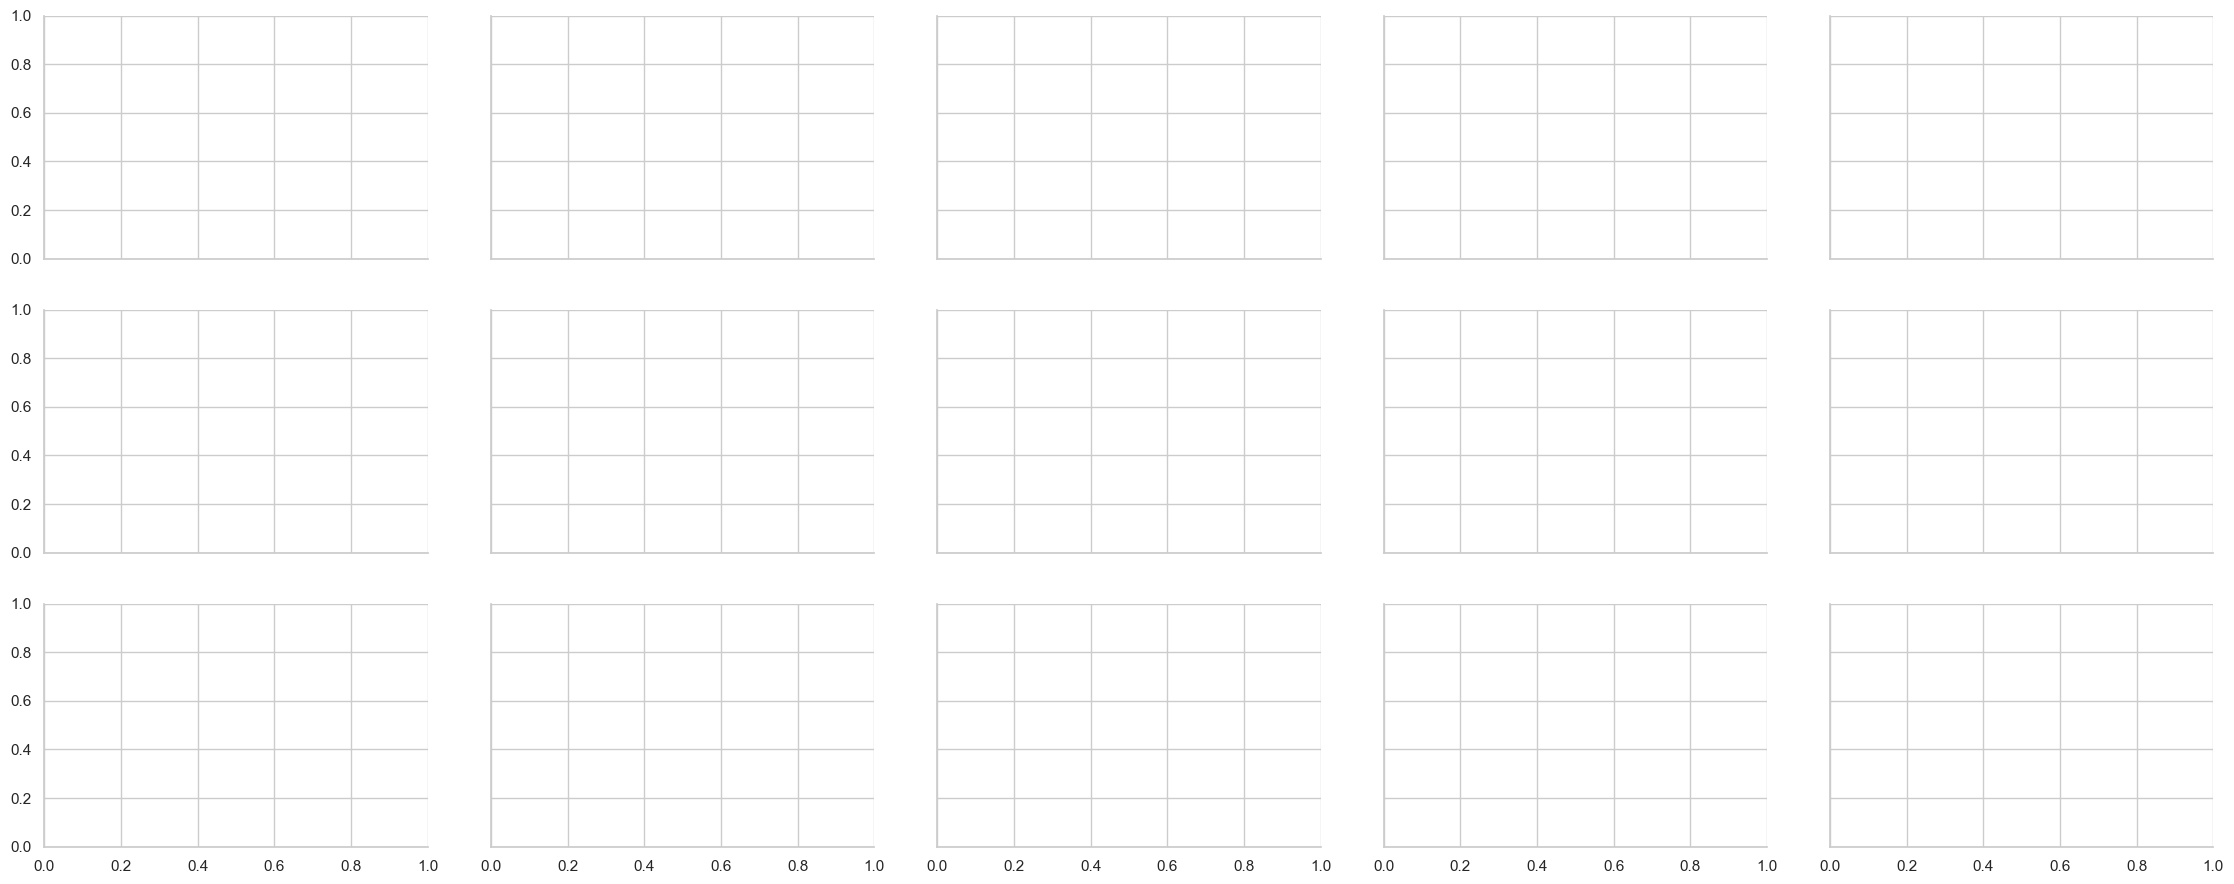

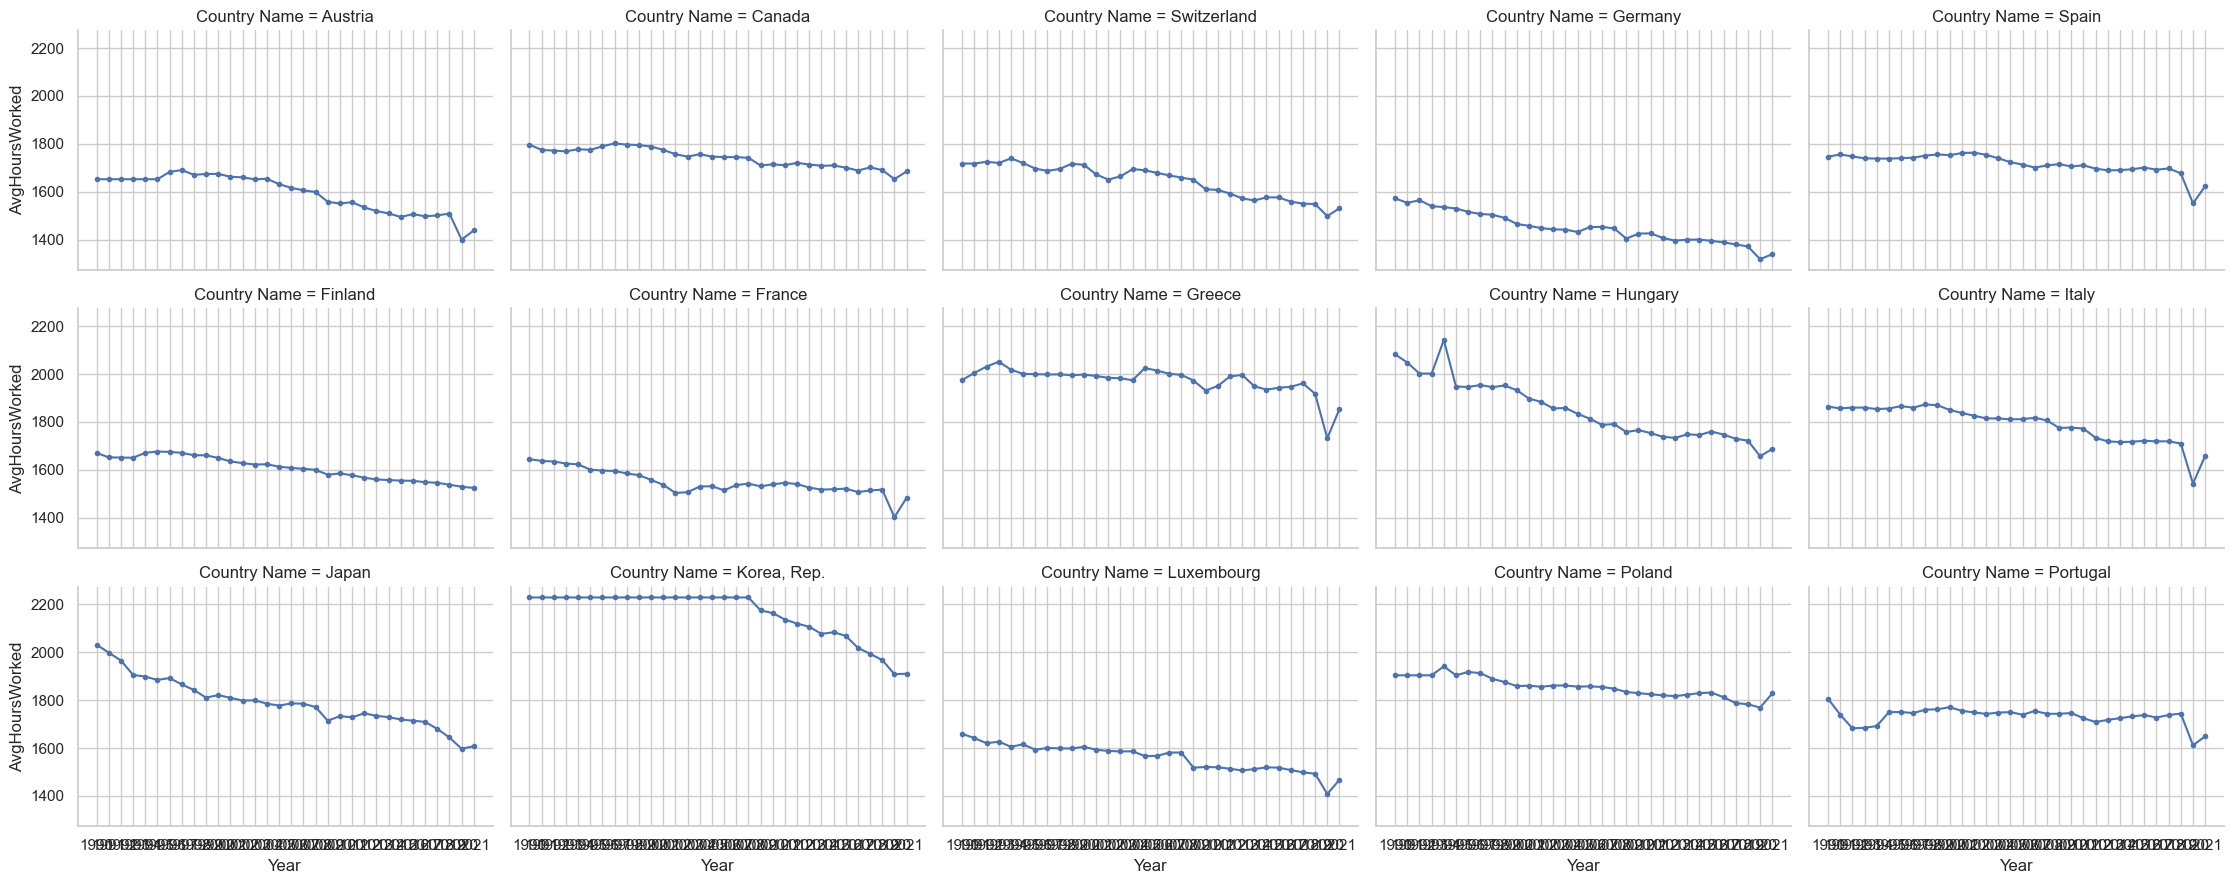

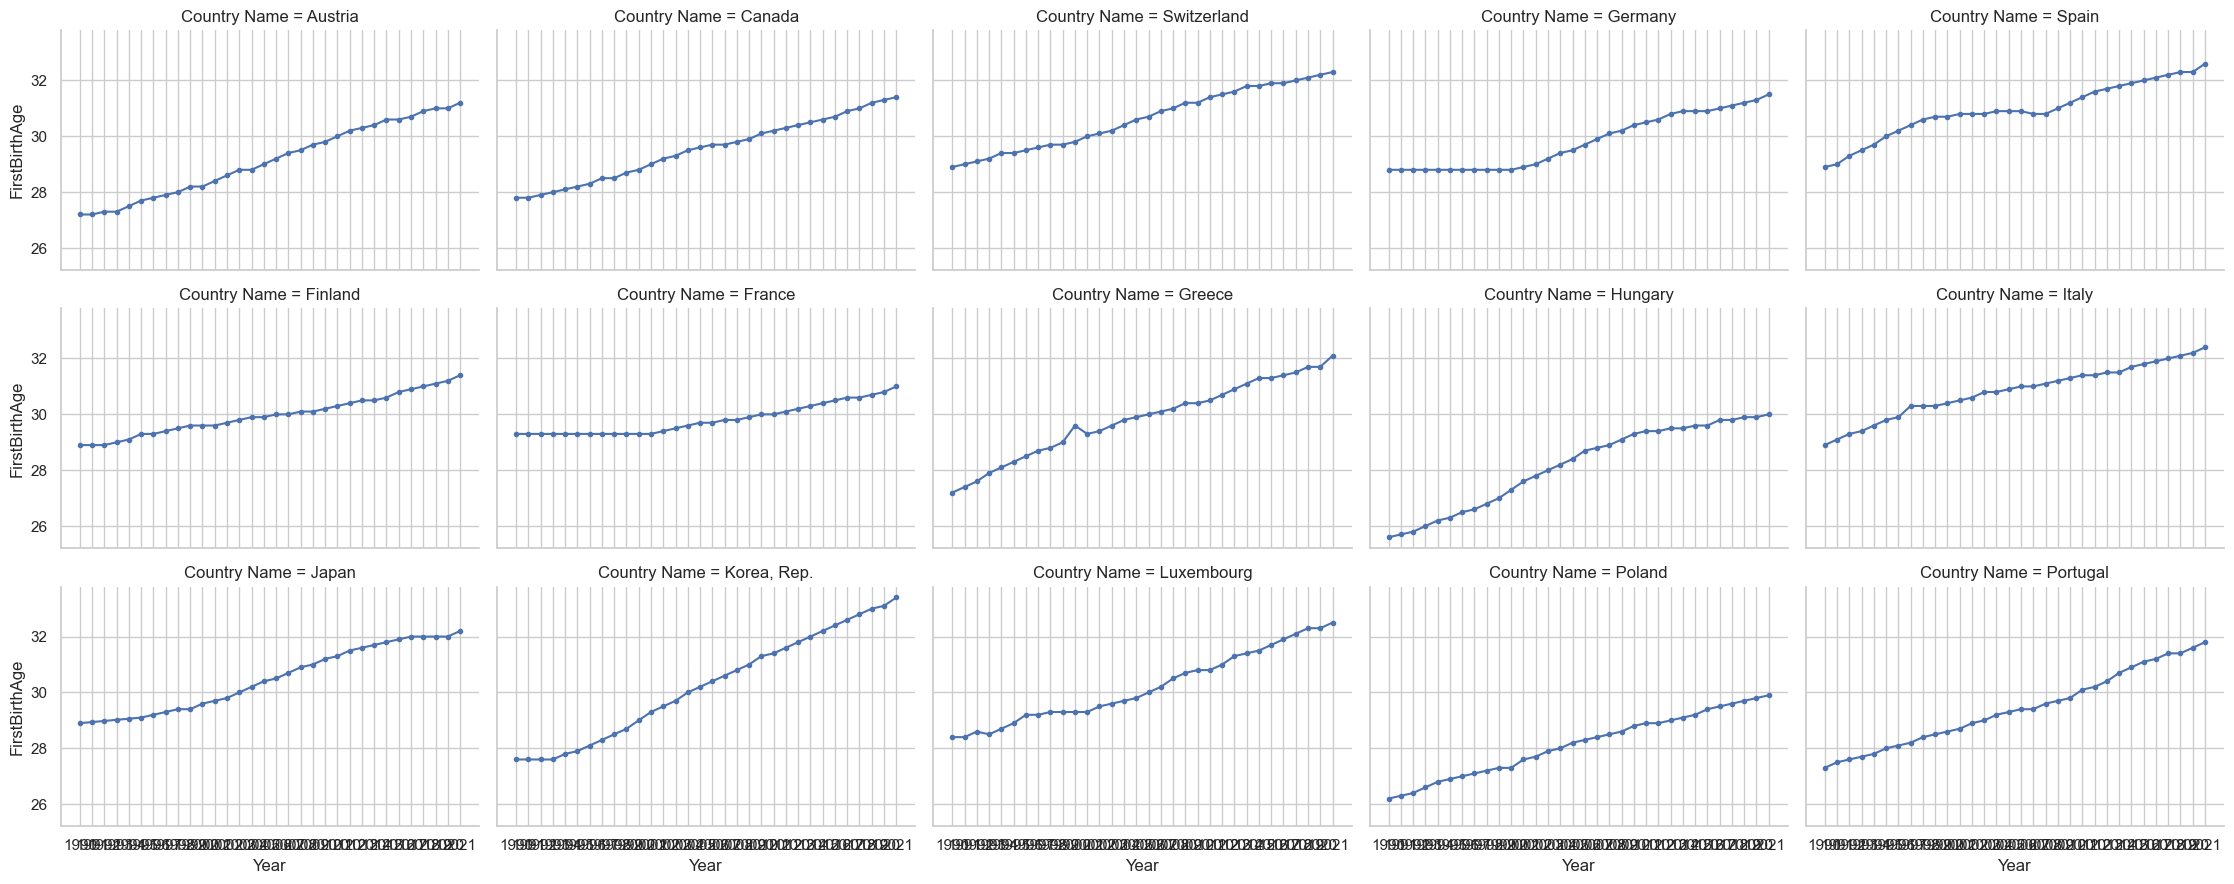

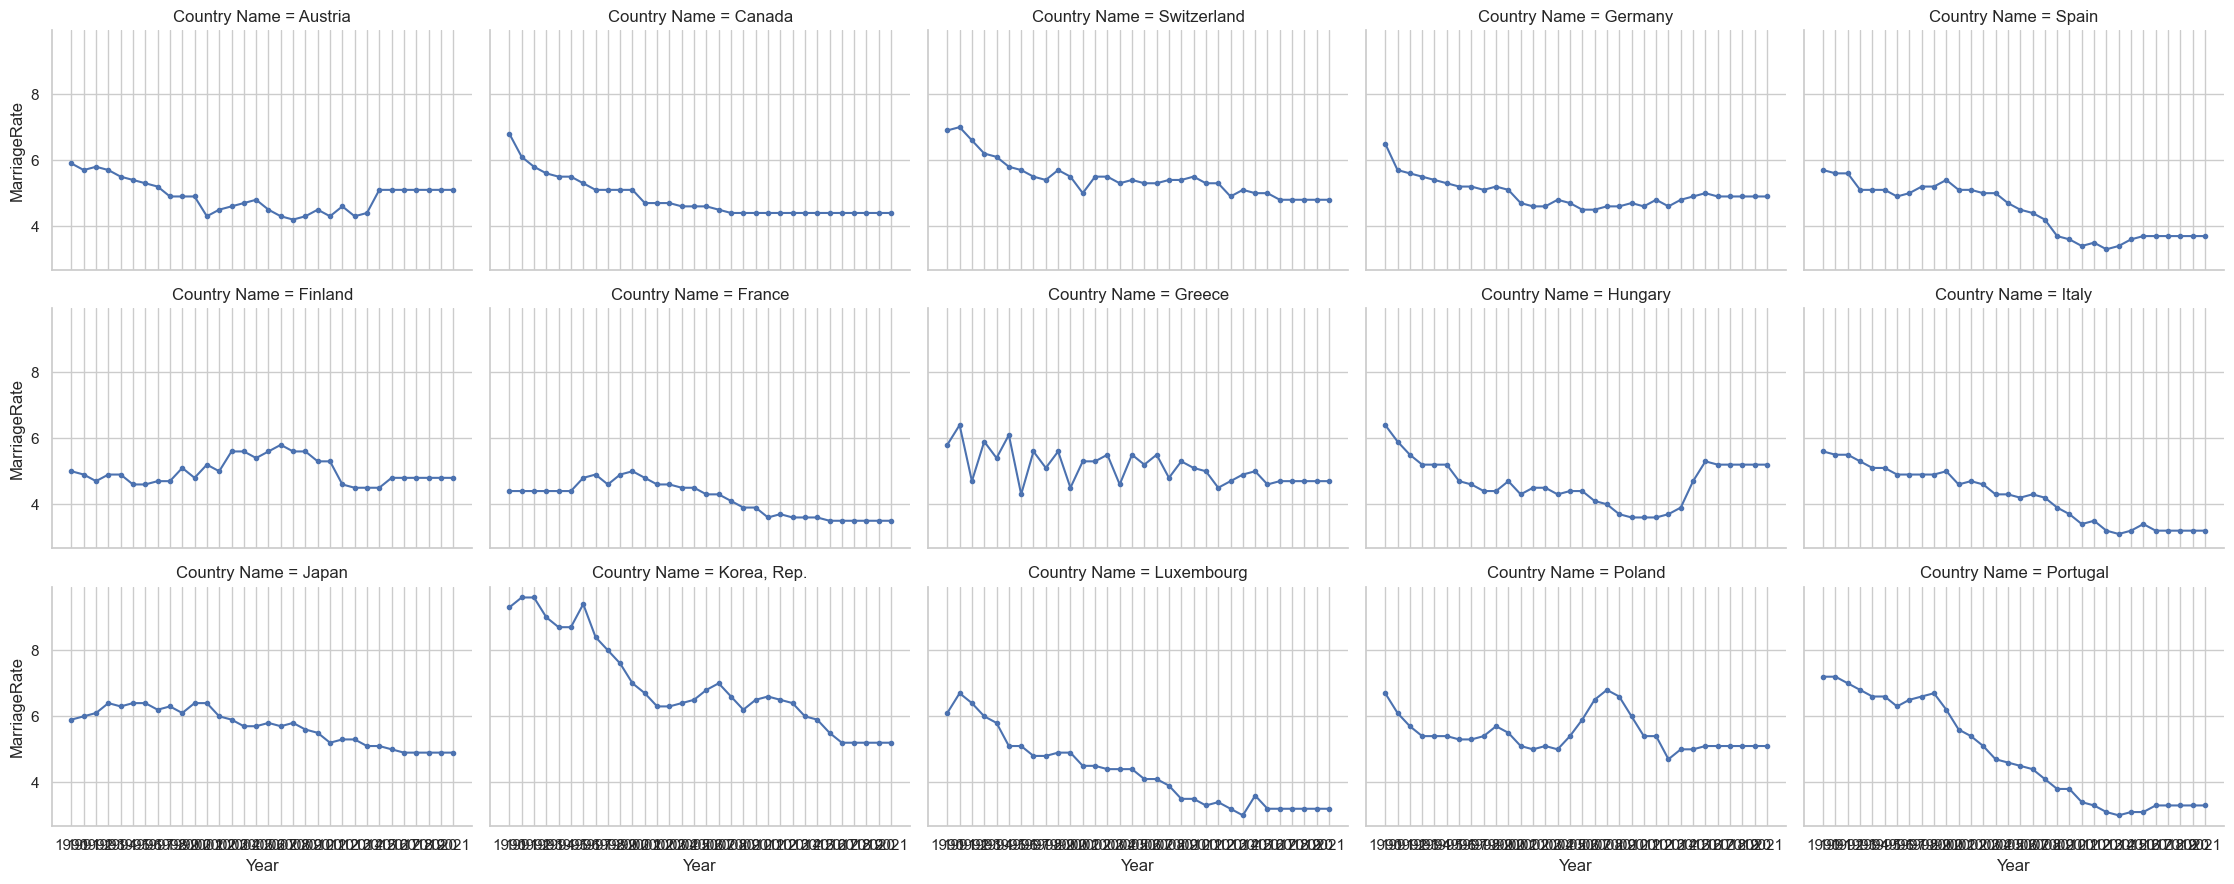

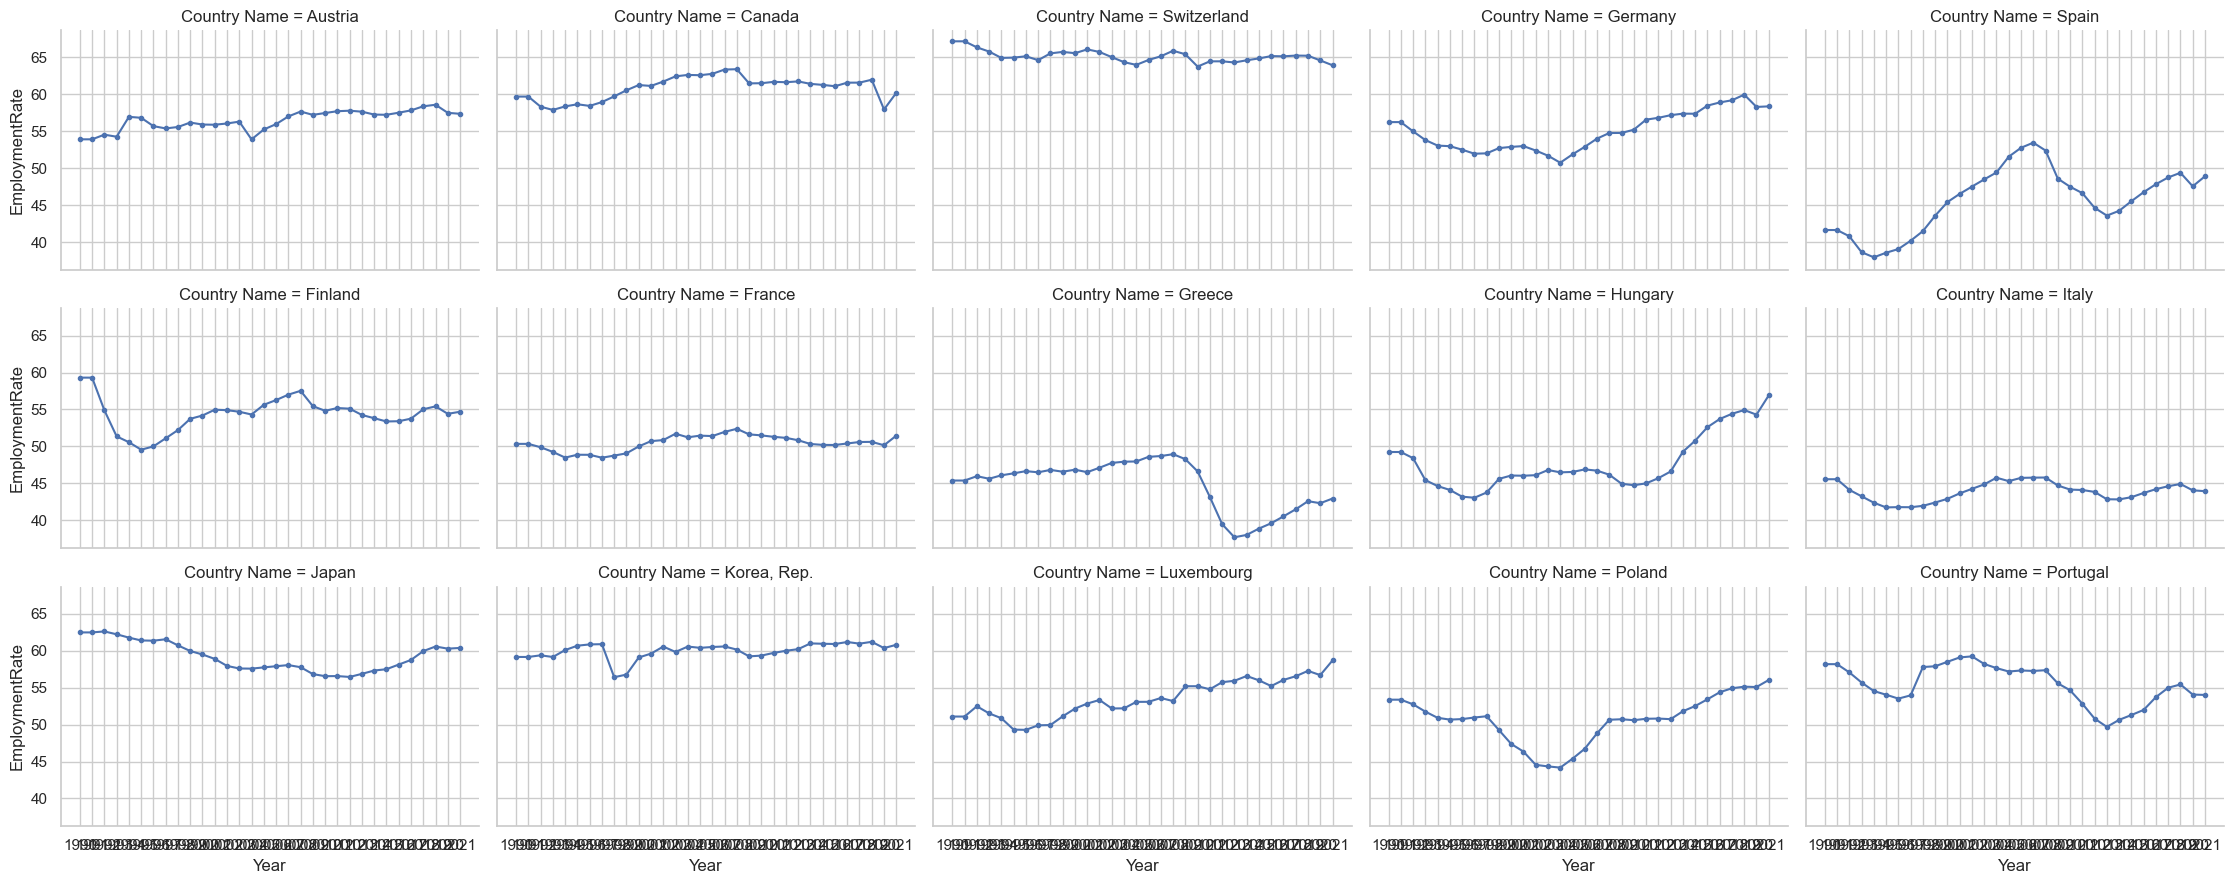

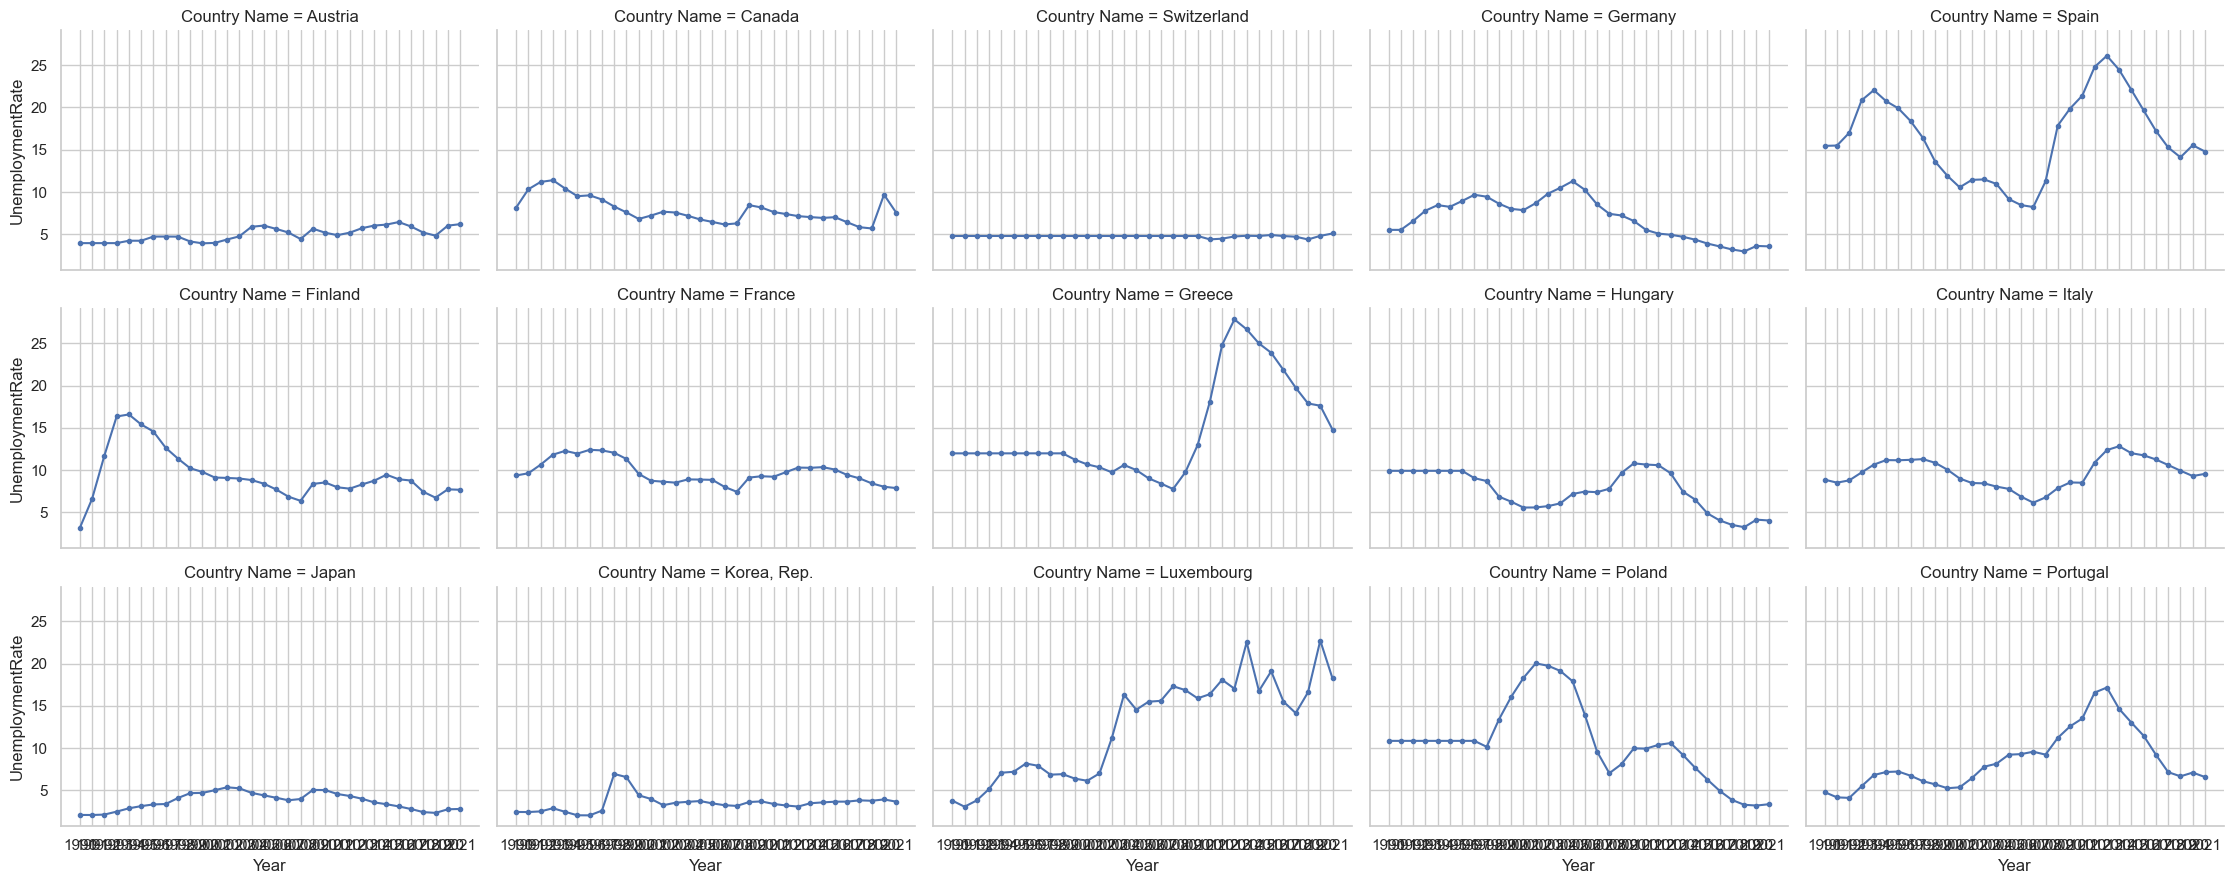

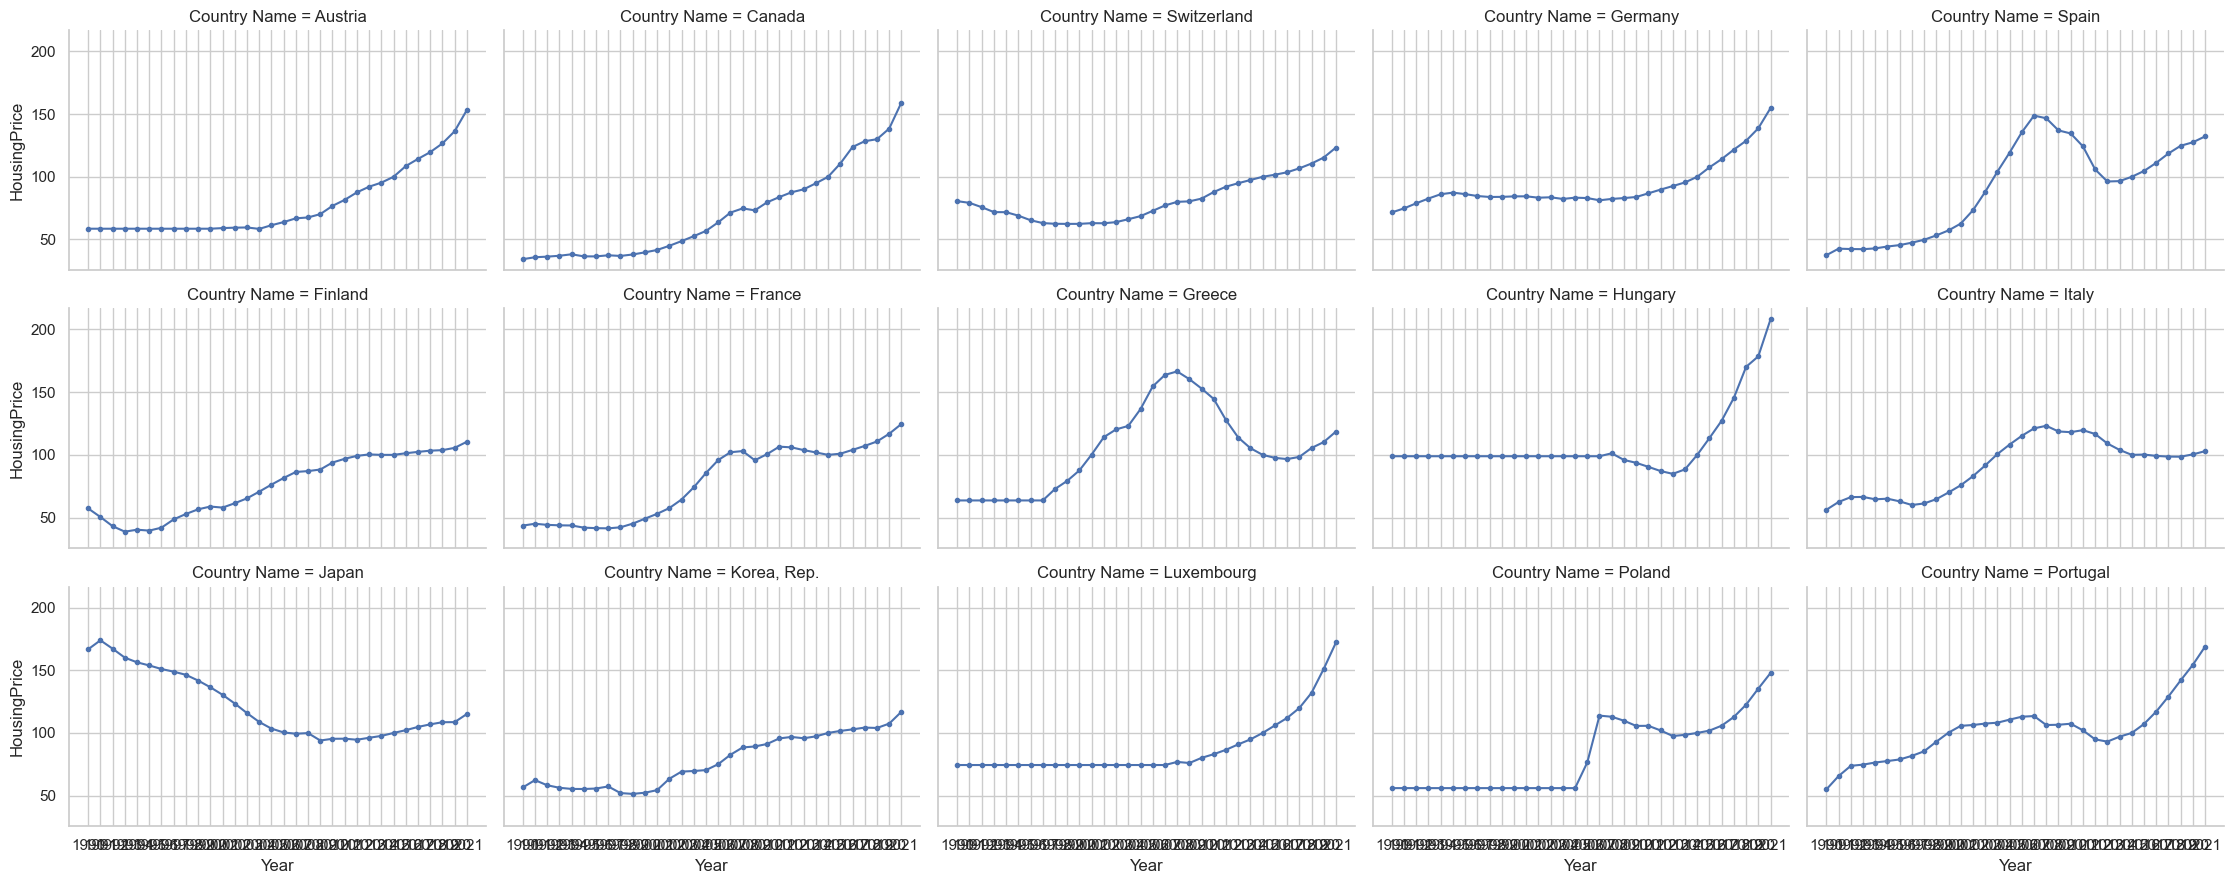

In [ ]:
# Seaborn 설정
sns.set(style="whitegrid")

# 'Year' 열이 데이터에 포함되어 있는지 확인
# if 'Year' not in data.columns:
#     # 'Year' 열 추가 필요

# 사용할 피처 리스트 (ID, Country Name, Year 등은 제외)
features = [
    'AvgHoursWorked', 'FirstBirthAge', 'MarriageRate', 'EmploymentRate', 'UnemploymentRate', 'HousingPrice', 'InterestRate', 'PartTimeRate', 'FamilyExpenditure', 'UnemploymentExpenditure', 'GDI', 'GDP', 'GNI', 'EduExpenditureOfGDP', 'DivorceRate']


# 각 피처에 대해 그래프를 그립니다.
for feature in features:
    g = sns.FacetGrid(merged_df, col="Country Name", col_wrap=5, height=3, aspect=1.5)
    g = g.map(plt.plot, "Year", feature, marker=".")

    # 축 이름 설정
    g.set_axis_labels("Year", feature)
    
#     # x 축 레이블을 5년 단위로 설정
#     g.set(xticks=merged_df['Year'][::5])

# # x 축의 레이블을 5년 단위로 회전 (선택 사항)
#     g.set_xticklabels(rotation=45)
    
#     # 그래프 타이틀 설정
#     g.set_titles("{col_name}")
    
    # 그래프를 표시합니다.
    plt.show()

In [59]:
# Save the DataFrame to an Excel file
merged_df.to_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/real_merged_data.xlsx", index=False)